# 1. Reducción imágenes NGC 55

In [1]:
#Paquetes necesarios: numpy, matplotlib y astropy
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from astropy.visualization import ZScaleInterval
from astropy.coordinates import SkyCoord
from astropy.visualization import make_lupton_rgb
from photutils.segmentation import (SourceCatalog, deblend_sources, detect_sources, detect_threshold)

In [2]:
#Extraemos las imágenes bias
bias1=fits.open('Bias_1x1_00000357.fit')[0].data
bias2=fits.open('Bias_1x1_00000358.fit')[0].data
bias3=fits.open('Bias_1x1_00000359.fit')[0].data
bias4=fits.open('Bias_1x1_00000360.fit')[0].data
bias5=fits.open('Bias_1x1_00000361.fit')[0].data
bias6=fits.open('Bias_1x1_00000362.fit')[0].data
bias7=fits.open('Bias_1x1_00000363.fit')[0].data
bias8=fits.open('Bias_1x1_00000364.fit')[0].data
bias9=fits.open('Bias_1x1_00000365.fit')[0].data
bias10=fits.open('Bias_1x1_00000366.fit')[0].data

#Abrimos los darks, son de 600 segundos de exposición en filtro V igual que las imágenes de ciencia
dark1=fits.open('Dark_600.000secs_00000208.fit')[0].data
dark2=fits.open('Dark_600.000secs_00000209.fit')[0].data
dark3=fits.open('Dark_600.000secs_00000210.fit')[0].data
dark4=fits.open('Dark_600.000secs_00000211.fit')[0].data
dark5=fits.open('Dark_600.000secs_00000212.fit')[0].data
dark6=fits.open('Dark_600.000secs_00000213.fit')[0].data
dark7=fits.open('Dark_600.000secs_00000214.fit')[0].data
dark8=fits.open('Dark_600.000secs_00000215.fit')[0].data
dark9=fits.open('Dark_600.000secs_00000216.fit')[0].data
dark10=fits.open('Dark_600.000secs_00000217.fit')[0].data

#Abrimos los flats B, estos son de 10 segundos de exposición #### PARA FILTRO B ####
flatB1=fits.open('FLAT_B_B11-001.fit')[0].data
flatB2=fits.open('FLAT_B_B11-002.fit')[0].data
flatB3=fits.open('FLAT_B_B11-003.fit')[0].data
flatB4=fits.open('FLAT_B_B11-004.fit')[0].data
flatB5=fits.open('FLAT_B_B11-005.fit')[0].data
flatB6=fits.open('FLAT_B_B11-006.fit')[0].data
flatB7=fits.open('FLAT_B_B11-007.fit')[0].data
flatB8=fits.open('FLAT_B_B11-008.fit')[0].data
flatB9=fits.open('FLAT_B_B11-009.fit')[0].data
flatB10=fits.open('FLAT_B_B11-010.fit')[0].data

#Abrimos los flats V, estos son de 10 segundos de exposición #### PARA FILTRO V ####
flatV1=fits.open('FLAT_V_B11-001.fit')[0].data
flatV2=fits.open('FLAT_V_B11-001.fit')[0].data
flatV3=fits.open('FLAT_V_B11-003.fit')[0].data
flatV4=fits.open('FLAT_V_B11-004.fit')[0].data
flatV5=fits.open('FLAT_V_B11-005.fit')[0].data
flatV6=fits.open('FLAT_V_B11-006.fit')[0].data
flatV7=fits.open('FLAT_V_B11-007.fit')[0].data
flatV8=fits.open('FLAT_V_B11-008.fit')[0].data
flatV9=fits.open('FLAT_V_B11-009.fit')[0].data
flatV10=fits.open('FLAT_V_B11-010.fit')[0].data


In [3]:
#Master BIAS
master_bias=np.mean([bias1,bias2,bias3,bias4,bias5,bias6,bias7,bias8,bias9,bias10],axis=0)
master_bias.shape

#Master DARK V
masterV_dark=np.median([dark1,dark2,dark3,dark4,dark5,dark6,dark7,dark8,dark9,dark10],axis=0) #Combinación simple de darks, incluye bias

#Master DARK B (aquí se utiliza un factor de escala debido a que no poseemos darks de 900 seguntos para el filtro B)
factor_escala = 900 / 600
masterB_dark = masterV_dark * factor_escala

#Dark Current
dark_current=np.mean([dark1-master_bias,dark2-master_bias,dark3-master_bias,dark4-master_bias,dark5-master_bias,dark6-master_bias,dark7-master_bias,dark8-master_bias,dark9-master_bias,dark10-master_bias],axis=0)/600 #Dark por segundo, no incluye bias

#MASTER FLAT V y normalizemoslo
#Nuestros flats son de 10 segundos de exposición, pero nuestro master dark es de 600, entonces vamos a 
#preferir escalar el dark current a 10 segundo para obtener un master dark de 10 segundos aproximado
master_flatV=np.median([flatV1-master_bias-dark_current*10,flatV2-master_bias-dark_current*10,\
    flatV3-master_bias-dark_current*10,flatV4-master_bias-dark_current*10,flatV5-master_bias-dark_current*10,\
    flatV6-master_bias-dark_current*10,flatV7-master_bias-dark_current*10,flatV8-master_bias-dark_current*10,\
    flatV9-master_bias-dark_current*10,flatV10-master_bias-dark_current*10],axis=0)
master_flatV_norm=master_flatV/np.mean(master_flatV)

#MASTER FLAT B y normalizemoslo
#Nuestros flats son de 10 segundos de exposición, pero nuestro master dark es de 900, entonces vamos a 
#preferir escalar el dark current a 10 segundo para obtener un master dark de 10 segundos aproximado
master_flatB=np.median([flatB1-master_bias-dark_current*10,flatB2-master_bias-dark_current*10,\
    flatB3-master_bias-dark_current*10,flatB4-master_bias-dark_current*10,flatB5-master_bias-dark_current*10,\
    flatB6-master_bias-dark_current*10,flatB7-master_bias-dark_current*10,flatB8-master_bias-dark_current*10,\
    flatB9-master_bias-dark_current*10,flatB10-master_bias-dark_current*10],axis=0)
master_flatB_norm=master_flatB/np.mean(master_flatB)

#Pequeño arreglo
#master_flatB[master_flatB==0]=0.0001
#master_flatV[master_flatV==0]=0.0001
#master_flat_sloani[master_flat_sloani==0]=0.0001

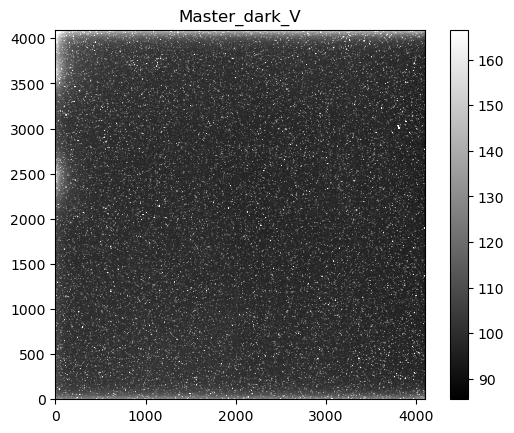

In [4]:
#Grafiquemos para el filtro V
#fig=plt.figure(figsize=(10,10))
zscale=ZScaleInterval(contrast=0.10)
min_value,max_value=zscale.get_limits(masterV_dark)

plt.imshow(masterV_dark,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Master_dark_V')
plt.colorbar()
plt.show()

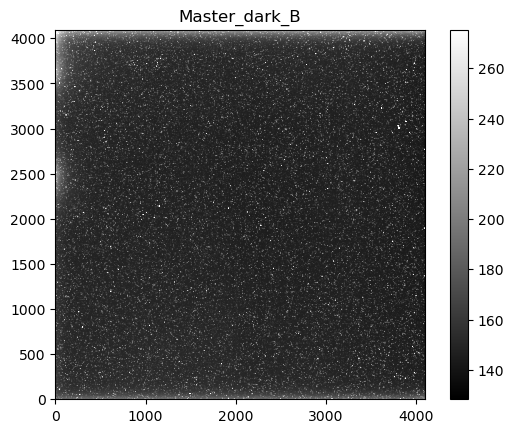

In [5]:
#Grafiquemos para el filtro B
#fig=plt.figure(figsize=(10,10))
zscale=ZScaleInterval(contrast=0.08)
min_value,max_value=zscale.get_limits(masterB_dark)

plt.imshow(masterB_dark,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Master_dark_B')
plt.colorbar()
plt.show()

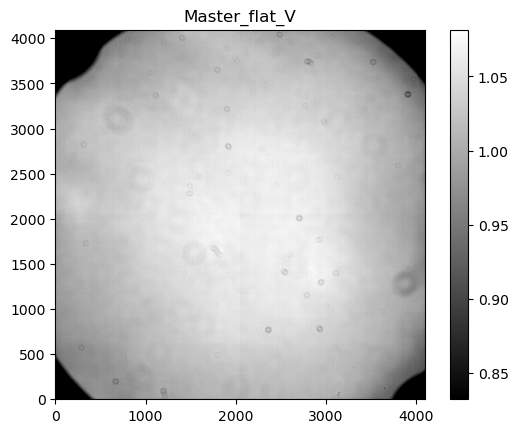

In [6]:
#Grafiquemos
#fig=plt.figure(figsize=(10,10))
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(master_flatV_norm)

plt.imshow(master_flatV_norm,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Master_flat_V')
plt.colorbar()
plt.show()

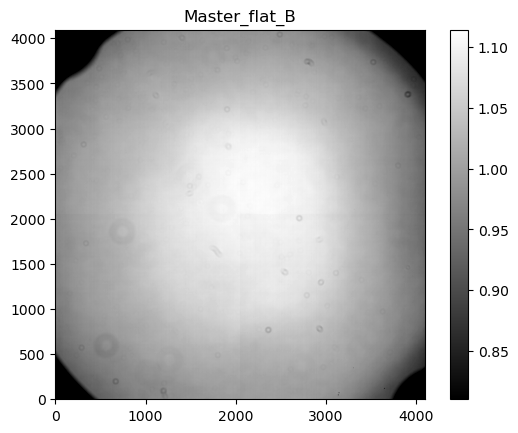

In [7]:
#Grafiquemos
#fig=plt.figure(figsize=(10,10))
zscale=ZScaleInterval(contrast=0.4)
min_value,max_value=zscale.get_limits(master_flatB_norm)

plt.imshow(master_flatB_norm,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Master_flat_B')
plt.colorbar()
plt.show()

Abrimos las imágenes de la nebulosa

In [8]:
#B, Abrimos las imágenes de ciencia de NGC 55 en FILTRO B, de 900 segundos de exposición
B1=fits.open('Light_Mouse_click_position_B_900.000secs_00000051.fit')

B2=fits.open('Light_Mouse_click_position_B_900.000secs_00000052.fit')

B3=fits.open('Light_Mouse_click_position_B_900.000secs_00000053.fit')

#V, Abrimos las imágenes de ciencia de NGC 55 en FILTRO V, de 600 segundos de exposición
V1=fits.open('Light_Mouse_click_position_V_600.000secs_00000048.fit')

V2=fits.open('Light_Mouse_click_position_V_600.000secs_00000049.fit')

V3=fits.open('Light_Mouse_click_position_V_600.000secs_00000050.fit')

#Extraigamos las imágenes para B
B1d=B1[0].data
B2d=B2[0].data
B3d=B3[0].data

#Extraigamos las imágenes para v
V1d=V1[0].data
V2d=V2[0].data
V3d=V3[0].data

In [9]:
epsilon = 1e-10  # Un valor pequeño para evitar divisiones por cero

BR1 = (B1d - masterB_dark) / (master_flatB_norm + epsilon)

BR2 = (B2d - masterB_dark) / (master_flatB_norm + epsilon)

BR3 = (B3d - masterB_dark) / (master_flatB_norm + epsilon)


VR1 = (V1d - masterV_dark) / (master_flatV_norm + epsilon)

VR2 = (V2d - masterV_dark) / (master_flatV_norm + epsilon)

VR3 = (V3d - masterV_dark) / (master_flatV_norm + epsilon)

# 2. Imágenes reducidas

### Raws

In [10]:
B_raw = np.median(np.array([B1[0].data, B2[0].data, B3[0].data]), axis=0)
V_raw = np.median(np.array([V1[0].data, V2[0].data, V3[0].data]), axis=0)

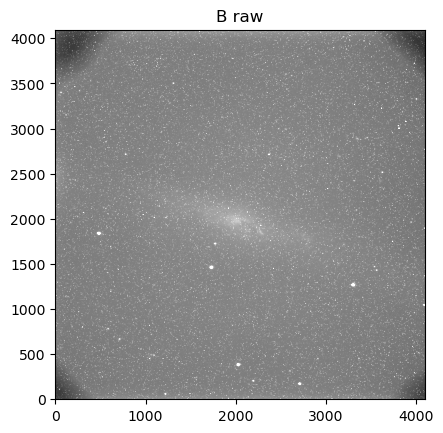

In [11]:
plt.imshow(B_raw, cmap='gray', vmin=0, vmax= np.mean(B_raw)+ np.std(B_raw), origin='lower')
plt.title('B raw')
plt.show()
#plt.savefig('B raw')
plt.close()

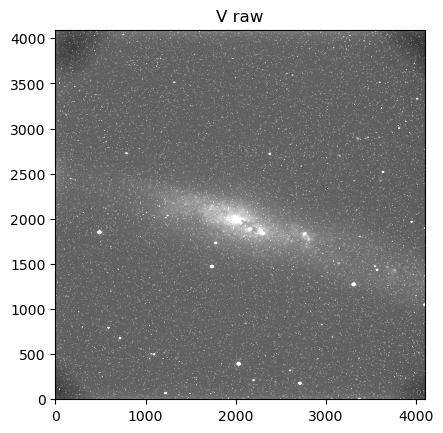

In [12]:
plt.imshow(V_raw, cmap='gray', vmin=0, vmax= np.mean(V_raw)+ np.std(V_raw), origin='lower')
plt.title('V raw')
plt.show()
#plt.savefig('V raw')
plt.close()

### Reducciones por Filtro

In [14]:
#Combinemos nuestras imágenes reducidas, quitamos los bordes multiplicando por una máscara
bpm=fits.open('BPM.fit')[0].data

B=np.mean([BR1,BR2,BR3],axis=0)*bpm
V=np.mean([VR1,VR2,VR3],axis=0)*bpm

B[B < 0] = 0
V[V <0] = 0

Para B

In [15]:
#Veamos que contiene
B1.info()

Filename: Light_Mouse_click_position_B_900.000secs_00000051.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   (4096, 4096)   uint16   


In [16]:
#Veamos el header
B1[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4096 / length of data axis 1                          
NAXIS2  =                 4096 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBSERVER= 'PUCV    '           / SBIGFITSEXT The name of the observer           
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '        

In [17]:
#Veamos la imagen en forma de matriz
B1d

array([[156, 155, 162, ..., 188, 184, 189],
       [173, 169, 169, ..., 195, 191, 204],
       [199, 192, 166, ..., 185, 183, 202],
       ...,
       [316, 340, 313, ..., 193, 217, 193],
       [465, 502, 313, ..., 179, 208, 200],
       [567, 682, 284, ..., 206, 180, 189]], dtype=uint16)

Para V

In [18]:
#Veamos que contiene
V1.info()

Filename: Light_Mouse_click_position_V_600.000secs_00000048.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   (4096, 4096)   uint16   


In [19]:
#Veamos el header
V1[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4096 / length of data axis 1                          
NAXIS2  =                 4096 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBSERVER= 'PUCV    '           / SBIGFITSEXT The name of the observer           
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '        

In [20]:
#Veamos la imagen en forma de matriz
V1d

array([[116, 122, 134, ..., 132, 127, 146],
       [135, 110, 143, ..., 148, 139, 125],
       [121, 132, 129, ..., 148, 148, 136],
       ...,
       [189, 202, 218, ..., 137, 149, 130],
       [230, 192, 204, ..., 142, 148, 152],
       [215, 193, 210, ..., 132, 154, 154]], dtype=uint16)

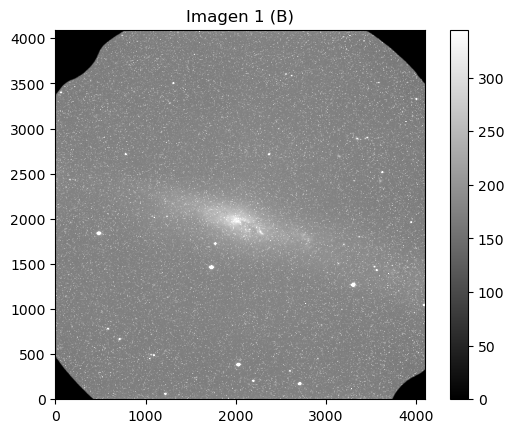

In [21]:
plt.imshow(B,cmap='gray',vmin=0, vmax=np.mean(B)+ np.std(B),origin='lower')
plt.title('Imagen 1 (B)') 
plt.colorbar()
#plt.savefig('BR1')
plt.show()

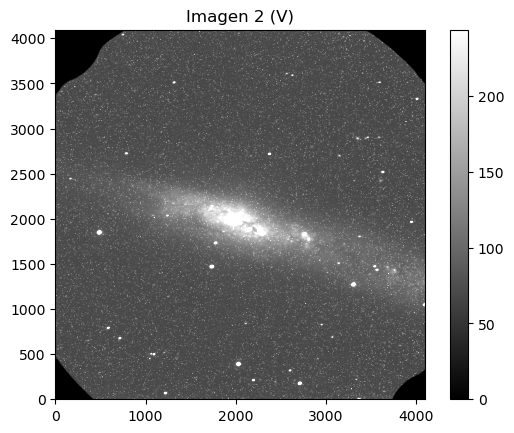

In [22]:
plt.imshow(V,cmap='gray',vmin=0, vmax=np.mean(V)+ np.std(V),origin='lower')
plt.title('Imagen 2 (V)')
plt.colorbar()
#plt.savefig('VR1')
plt.show()

In [23]:
#Finalmente obtenemos una imagen rgb a color
G=V*0.05
R=Si*0.07
Bl=B*0.05
rgb= make_lupton_rgb(R,G,Bl,minimum=3.7,stretch=7,Q=5)
plt.imshow(rgb, origin='lower')
plt.colorbar()
plt.savefig('rgb.png',dpi='figure')
plt.show()
plt.close()

NameError: name 'Si' is not defined

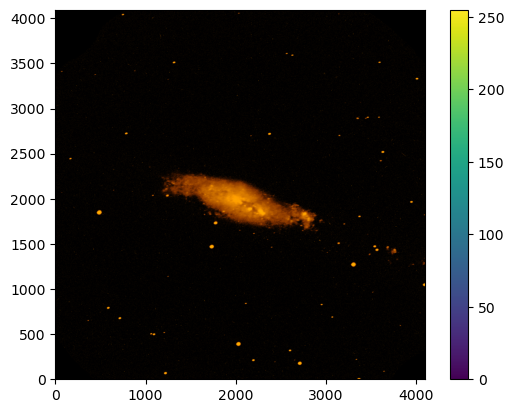

In [42]:
# Calcula el filtro promedio de B y V
BV_avg = (B + V) / 2

R = V * 0.05
G = BV_avg * 0.07  
B = B * 0.05
rgb = make_lupton_rgb(R, G, B, minimum=3.7, stretch=7, Q=5)
plt.imshow(rgb, origin='lower')
plt.colorbar()
#plt.title('Imagen RGB (usando B y V)')
#plt.savefig('rgb_avg.png', dpi='figure')
plt.show()
plt.close()


# 3. Astrometría

PARA B

In [44]:
#Creación de fits y astrometría
phdu=fits.PrimaryHDU(header=B1[0].header,data=B)
phdu.data=np.float32(phdu.data)

# Añadiendo parámetros al header
phdu.header['PIXSCALE'] = 0.36
phdu.header['CTYPE1'] = 'RA---TAN'
phdu.header['CTYPE2'] = 'DEC--TAN'
phdu.header['CRPIX1'] = int(phdu.header['NAXIS1']/2)
phdu.header['CRPIX2'] = int(phdu.header['NAXIS2']/2)

# Transformación de coordenadas de RA y DEC
coord=SkyCoord(f"{phdu.header['OBJCTRA']} {phdu.header['OBJCTDEC']}", unit=(u.hourangle, u.deg)) #Transformacion de unidades a grados decimales
phdu.header['CRVAL1'] = coord.ra.value
phdu.header['CRVAL2'] = coord.dec.value

# Matriz de distorsión
phdu.header['CD1_1'] = -0.0001
phdu.header['CD1_2'] = 0
phdu.header['CD2_1'] = 0
phdu.header['CD2_2'] = 0.0001

# Guardar el archivo fits
phdu.writeto('testB.fits',overwrite=True)

In [45]:
#Abrimos las imágenes 
IMG_FinalB=fits.open('testB.fits')

IMG_FinalB.info()

Filename: testB.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      60   (4096, 4096)   float32   


In [46]:
#Veamos el header
IMG_FinalB[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBSERVER= 'PUCV    '           / SBIGFITSEXT The name of the observer           
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '           / SBIGFITSEXT The model Telescope                
FOCALLEN=                6500. / SBIGFITSEXT Telescope focal length in mm       
APTDIA  =                 500. / SBIGFITSEXT Aperture diameter in mm            
SBUUID  = '{453113e4-2e42-43

PARA V

In [47]:
#Creación de fits y astrometría
phdu=fits.PrimaryHDU(header=V1[0].header,data=V)
phdu.data=np.float32(phdu.data)

# Añadiendo parámetros al header
phdu.header['PIXSCALE'] = 0.36
phdu.header['CTYPE1'] = 'RA---TAN'
phdu.header['CTYPE2'] = 'DEC--TAN'
phdu.header['CRPIX1'] = int(phdu.header['NAXIS1']/2)
phdu.header['CRPIX2'] = int(phdu.header['NAXIS2']/2)

# Transformación de coordenadas de RA y DEC
coord=SkyCoord(f"{phdu.header['OBJCTRA']} {phdu.header['OBJCTDEC']}", unit=(u.hourangle, u.deg)) #Transformacion de unidades a grados decimales
phdu.header['CRVAL1'] = coord.ra.value
phdu.header['CRVAL2'] = coord.dec.value

# Matriz de distorsión
phdu.header['CD1_1'] = -0.0001
phdu.header['CD1_2'] = 0
phdu.header['CD2_1'] = 0
phdu.header['CD2_2'] = 0.0001

# Guardar el archivo fits
phdu.writeto('testV.fits',overwrite=True)

In [48]:
#Abrimos las imágenes 
IMG_FinalV=fits.open('testV.fits')

IMG_FinalV.info()

Filename: testV.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      60   (4096, 4096)   float32   


In [49]:
IMG_FinalV[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBSERVER= 'PUCV    '           / SBIGFITSEXT The name of the observer           
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '           / SBIGFITSEXT The model Telescope                
FOCALLEN=                6500. / SBIGFITSEXT Telescope focal length in mm       
APTDIA  =                 500. / SBIGFITSEXT Aperture diameter in mm            
SBUUID  = '{837e18fe-938c-43

# 4. Reducción Estrellas

### 4.1 Estrella HIP_277

In [50]:
#Darks estrella 1
darkHIP1_1B=fits.open('Dark_20.000secs_00000027.fit')[0].data
darkHIP1_2B=fits.open('Dark_20.000secs_00000028.fit')[0].data
darkHIP1_3B=fits.open('Dark_20.000secs_00000029.fit')[0].data
darkHIP1_4B=fits.open('Dark_20.000secs_00000030.fit')[0].data
darkHIP1_5B=fits.open('Dark_20.000secs_00000031.fit')[0].data
darkHIP1_6B=fits.open('Dark_20.000secs_00000032.fit')[0].data
darkHIP1_7B=fits.open('Dark_20.000secs_00000033.fit')[0].data
darkHIP1_8B=fits.open('Dark_20.000secs_00000034.fit')[0].data
darkHIP1_9B=fits.open('Dark_20.000secs_00000035.fit')[0].data
darkHIP1_10B=fits.open('Dark_20.000secs_00000036.fit')[0].data

In [51]:
#Master DARK B
masterB_darkHIP1=np.median([darkHIP1_1B,darkHIP1_2B,darkHIP1_3B,darkHIP1_4B,darkHIP1_5B,darkHIP1_6B,darkHIP1_7B,darkHIP1_8B,darkHIP1_9B,darkHIP1_10B],axis=0) #Combinación simple de darks, incluye bias

#Master DARK V
factor_escala2 = 5 / 20
masterV_darkHIP1 = masterB_darkHIP1 * factor_escala2

#Dark Current
dark_currentHIP1=np.mean([darkHIP1_1B-master_bias,darkHIP1_2B-master_bias,darkHIP1_3B-master_bias,darkHIP1_4B-master_bias,darkHIP1_5B-master_bias,darkHIP1_6B-master_bias,darkHIP1_7B-master_bias,darkHIP1_8B-master_bias,darkHIP1_9B-master_bias,darkHIP1_10B-master_bias],axis=0)/20 #Dark por segundo, no incluye bias

#Master flatB y normalizemoslo
#Nuestros flats son de 10 segundos de exposición, pero nuestro master dark es de 100, entonces vamos a 
#preferir escalar el dark current a 10 segundo para obtener un master dark de 10 segundos aproximado
master_flatB_HIP1=np.median([flatB1-master_bias-dark_currentHIP1*10,flatB2-master_bias-dark_currentHIP1*10,\
    flatB3-master_bias-dark_currentHIP1*10,flatB4-master_bias-dark_currentHIP1*10,flatB5-master_bias-dark_currentHIP1*10,\
    flatB6-master_bias-dark_currentHIP1*10,flatB7-master_bias-dark_currentHIP1*10,flatB8-master_bias-dark_currentHIP1*10,\
    flatB9-master_bias-dark_currentHIP1*10,flatB10-master_bias-dark_currentHIP1*10],axis=0)
master_flatB_HIP1_norm=master_flatB_HIP1/np.mean(master_flatB_HIP1)

#Master flatV y normalizemoslo
#Nuestros flats son de 10 segundos de exposición, pero nuestro master dark es de 100, entonces vamos a 
#preferir escalar el dark current a 10 segundo para obtener un master dark de 10 segundos aproximado
master_flatV_HIP1=np.median([flatV1-master_bias-dark_currentHIP1*10,flatV2-master_bias-dark_currentHIP1*10,\
    flatV3-master_bias-dark_currentHIP1*10,flatV4-master_bias-dark_currentHIP1*10,flatV5-master_bias-dark_currentHIP1*10,\
    flatV6-master_bias-dark_currentHIP1*10,flatV7-master_bias-dark_currentHIP1*10,flatV8-master_bias-dark_currentHIP1*10,\
    flatV9-master_bias-dark_currentHIP1*10,flatV10-master_bias-dark_currentHIP1*10],axis=0)
master_flatV_HIP1_norm=master_flatV_HIP1/np.mean(master_flatV_HIP1)

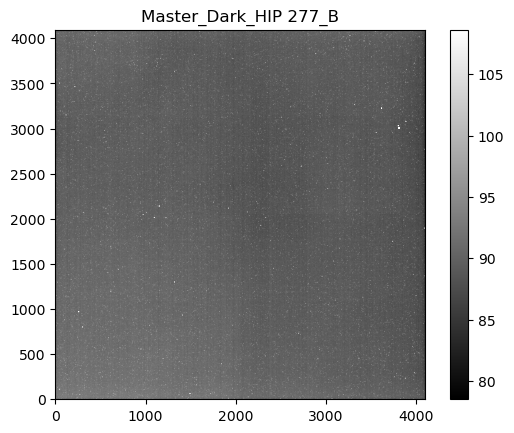

In [66]:
#Grafiquemoslos
#fig=plt.figure(figsize=(10,10))
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(masterB_darkHIP1)

plt.imshow(masterB_darkHIP1,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Master_Dark_HIP 277_B')
plt.colorbar()
plt.show()

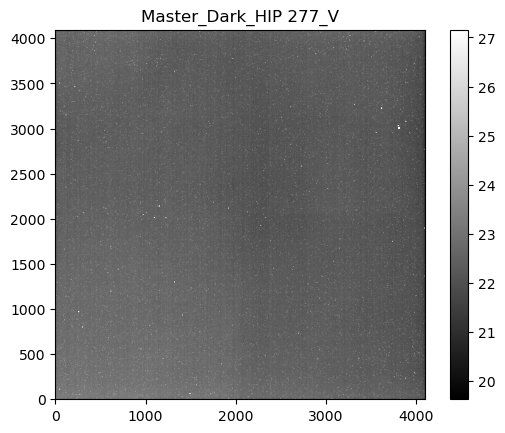

In [65]:
#Grafiquemoslos
#fig=plt.figure(figsize=(10,10))
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(masterV_darkHIP1)

plt.imshow(masterV_darkHIP1,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Master_Dark_HIP 277_V')
plt.colorbar()
plt.show()

In [54]:
#Abrimos las imágenes de ciencia de HIP 277 en flitro B, de 20 segundos de exposición
B1E1=fits.open('Light_Mouse_click_position_B_20.000secs_00000103.fit')

B2E1=fits.open('Light_Mouse_click_position_B_20.000secs_00000104.fit')

B3E1=fits.open('Light_Mouse_click_position_B_20.000secs_00000105.fit')

B4E1=fits.open('Light_Mouse_click_position_B_20.000secs_00000106.fit')

B5E1=fits.open('Light_Mouse_click_position_B_20.000secs_00000107.fit')


#Abrimos las imágenes de ciencia de HIP 277 en flitro V, de 5 segundos de exposición
V1E1=fits.open('Light_Mouse_click_position_V_5.000secs_00000098.fit')

V2E1=fits.open('Light_Mouse_click_position_V_5.000secs_00000099.fit')

V3E1=fits.open('Light_Mouse_click_position_V_5.000secs_00000100.fit')

V4E1=fits.open('Light_Mouse_click_position_V_5.000secs_00000101.fit')

V5E1=fits.open('Light_Mouse_click_position_V_5.000secs_00000102.fit')

#Extraigamos las imágenes de B
B1E1d=B1E1[0].data
B2E1d=B2E1[0].data
B3E1d=B3E1[0].data
B4E1d=B4E1[0].data
B5E1d=B5E1[0].data


#Extraigamos las imágenes de V
V1E1d=V1E1[0].data
V2E1d=V2E1[0].data
V3E1d=V3E1[0].data
V4E1d=V4E1[0].data
V5E1d=V5E1[0].data

In [55]:
epsilon = 1e-10  # Un valor pequeño para evitar divisiones por cero

#Hagámos la reducción para B
BR1_E1=(B1E1d-masterB_darkHIP1)/(master_flatB_HIP1_norm + epsilon)

BR2_E1=(B2E1d-masterB_darkHIP1)/(master_flatB_HIP1_norm + epsilon)

BR3_E1=(B3E1d-masterB_darkHIP1)/(master_flatB_HIP1_norm + epsilon)

BR4_E1=(B4E1d-masterB_darkHIP1)/(master_flatB_HIP1_norm + epsilon)

BR5_E1=(B5E1d-masterB_darkHIP1)/(master_flatB_HIP1_norm + epsilon)

#Hagámos la reducción para V
VR1_E1=(V1E1d-masterV_darkHIP1)/(master_flatV_HIP1_norm + epsilon)

VR2_E1=(V2E1d-masterV_darkHIP1)/(master_flatV_HIP1_norm + epsilon)

VR3_E1=(V3E1d-masterV_darkHIP1)/(master_flatV_HIP1_norm + epsilon)

VR4_E1=(V4E1d-masterV_darkHIP1)/(master_flatV_HIP1_norm + epsilon)

VR5_E1=(V5E1d-masterV_darkHIP1)/(master_flatV_HIP1_norm + epsilon)



### Reducciones y Raws Estrella HIP_277

In [56]:
#Combinemos nuestras imágenes reducidas, quitamos los bordes multiplicando por una máscara
bpm=fits.open('BPM.fit')[0].data

#Reducciones
BE1=np.mean([BR1_E1,BR2_E1,BR3_E1,BR4_E1,BR5_E1],axis=0)*bpm
VE1=np.mean([VR1_E1,VR2_E1,VR3_E1,VR4_E1,VR5_E1],axis=0)*bpm

#Raws
B_E1raw = np.median(np.array([B1E1[0].data, B2E1[0].data, B3E1[0].data]), axis=0)
V_E1raw = np.median(np.array([V1E1[0].data, V2E1[0].data, V3E1[0].data]), axis=0)

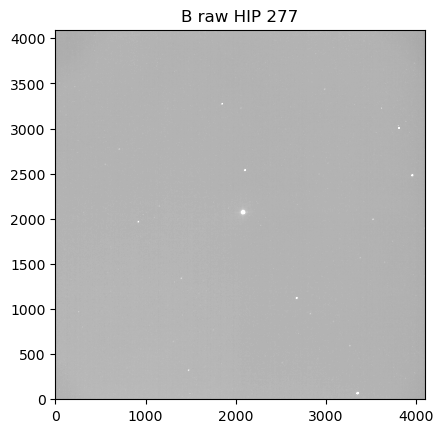

In [57]:
plt.imshow(B_E1raw, cmap='gray', vmin=0, vmax= np.mean(B_E1raw)+ np.std(B_E1raw), origin='lower')
plt.title('B raw HIP 277')
plt.show()
#plt.savefig('B raw')
plt.close()

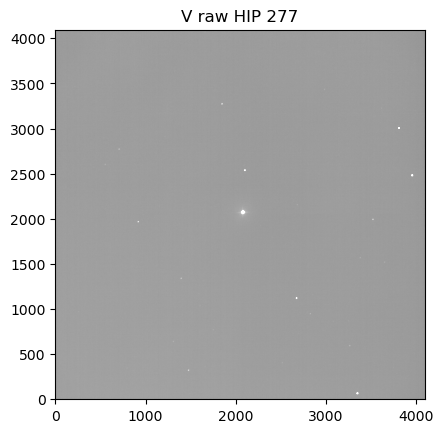

In [58]:
plt.imshow(V_E1raw, cmap='gray', vmin=0, vmax= np.mean(V_E1raw)+ np.std(V_E1raw), origin='lower')
plt.title('V raw HIP 277')
plt.show()
#plt.savefig('V raw')
plt.close()

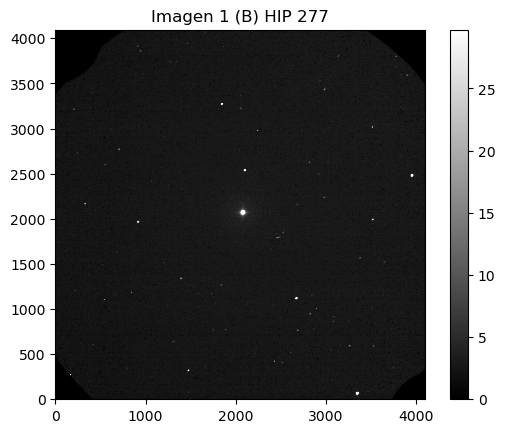

In [59]:
plt.imshow(BE1,cmap='gray',vmin=0, vmax= np.mean(BE1)+ np.std(BE1), origin='lower')
plt.title('Imagen 1 (B) HIP 277') 
plt.colorbar()
plt.savefig('BE1')
plt.show()

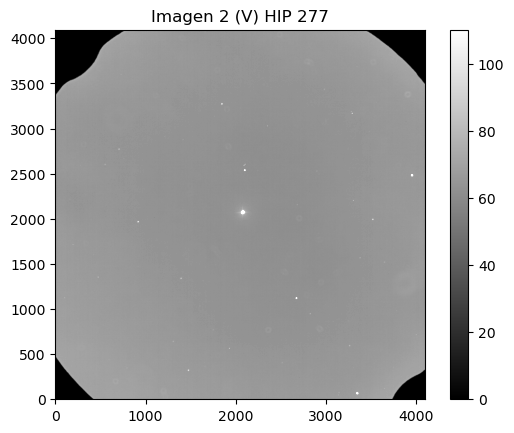

In [60]:
plt.imshow(VE1,cmap='gray',vmin=0, vmax= np.mean(VE1)+ np.std(VE1), origin='lower')
plt.title('Imagen 2 (V) HIP 277') 
plt.colorbar()
plt.savefig('VE1')
plt.show()

### 4.2 Estrella HIP_1101

In [61]:
darkHIP2_1B=fits.open('Dark_20.000secs_00000027.fit')[0].data
darkHIP2_2B=fits.open('Dark_20.000secs_00000028.fit')[0].data
darkHIP2_3B=fits.open('Dark_20.000secs_00000029.fit')[0].data
darkHIP2_4B=fits.open('Dark_20.000secs_00000030.fit')[0].data
darkHIP2_5B=fits.open('Dark_20.000secs_00000031.fit')[0].data
darkHIP2_6B=fits.open('Dark_20.000secs_00000032.fit')[0].data
darkHIP2_7B=fits.open('Dark_20.000secs_00000033.fit')[0].data
darkHIP2_8B=fits.open('Dark_20.000secs_00000034.fit')[0].data
darkHIP2_9B=fits.open('Dark_20.000secs_00000035.fit')[0].data
darkHIP2_10B=fits.open('Dark_20.000secs_00000036.fit')[0].data

In [62]:
#Master DARK B
masterB_darkHIP2=np.median([darkHIP2_1B,darkHIP2_2B,darkHIP2_3B,darkHIP2_4B,darkHIP2_5B,darkHIP2_6B,darkHIP2_7B,darkHIP2_8B,darkHIP2_9B,darkHIP2_10B],axis=0) #Combinación simple de darks, incluye bias

#Master DARK V
factor_escala3 = 5 / 20 # el factor de escala se utiliza ya que solo poseemos darks de 20 segundos, por lo que lo necesitamos para los darks de 5 segundos 
masterV_darkHIP2 = masterB_darkHIP2 * factor_escala3

#Dark Current
dark_currentHIP2=np.mean([darkHIP2_1B-master_bias,darkHIP2_2B-master_bias,darkHIP2_3B-master_bias,darkHIP2_4B-master_bias,darkHIP2_5B-master_bias,darkHIP2_6B-master_bias,darkHIP2_7B-master_bias,darkHIP2_8B-master_bias,darkHIP2_9B-master_bias,darkHIP2_10B-master_bias],axis=0)/20 #Dark por segundo, no incluye bias

#Master flatB y normalizemoslo
#Nuestros flats son de 10 segundos de exposición, pero nuestro master dark es de 100, entonces vamos a 
#preferir escalar el dark current a 10 segundo para obtener un master dark de 10 segundos aproximado
master_flatB_HIP2=np.median([flatB1-master_bias-dark_currentHIP2*10,flatB2-master_bias-dark_currentHIP2*10,\
    flatB3-master_bias-dark_currentHIP2*10,flatB4-master_bias-dark_currentHIP2*10,flatB5-master_bias-dark_currentHIP2*10,\
    flatB6-master_bias-dark_currentHIP2*10,flatB7-master_bias-dark_currentHIP2*10,flatB8-master_bias-dark_currentHIP2*10,\
    flatB9-master_bias-dark_currentHIP2*10,flatB10-master_bias-dark_currentHIP2*10],axis=0)
master_flatB_HIP2_norm=master_flatB_HIP2/np.mean(master_flatB_HIP2)

#Master flatV y normalizemoslo
#Nuestros flats son de 10 segundos de exposición, pero nuestro master dark es de 100, entonces vamos a 
#preferir escalar el dark current a 10 segundo para obtener un master dark de 10 segundos aproximado
master_flatV_HIP2=np.median([flatV1-master_bias-dark_currentHIP2*10,flatV2-master_bias-dark_currentHIP2*10,\
    flatV3-master_bias-dark_currentHIP2*10,flatV4-master_bias-dark_currentHIP2*10,flatV5-master_bias-dark_currentHIP2*10,\
    flatV6-master_bias-dark_currentHIP2*10,flatV7-master_bias-dark_currentHIP2*10,flatV8-master_bias-dark_currentHIP2*10,\
    flatV9-master_bias-dark_currentHIP2*10,flatV10-master_bias-dark_currentHIP2*10],axis=0)
master_flatV_HIP2_norm=master_flatV_HIP2/np.mean(master_flatV_HIP2)

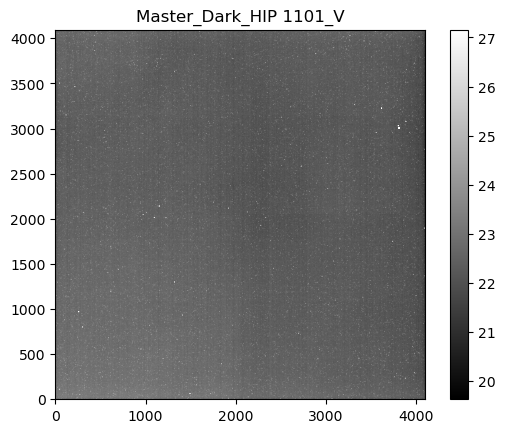

In [67]:
#fig=plt.figure(figsize=(10,10))
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(masterV_darkHIP2)

plt.imshow(masterV_darkHIP2,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Master_Dark_HIP 1101_V')
plt.colorbar()
plt.show()

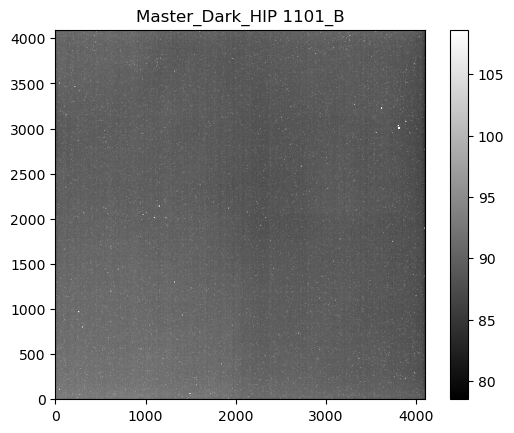

In [68]:
#fig=plt.figure(figsize=(10,10))
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(masterB_darkHIP2)

plt.imshow(masterB_darkHIP2,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Master_Dark_HIP 1101_B')
plt.colorbar()
plt.show()

In [69]:
#Abrimos las imágenes de ciencia de HIP 1101 en flitro B, de 20 segundos de exposición
B1E2=fits.open('Light_Mouse_click_position_B_20.000secs_00000116.fit')

B2E2=fits.open('Light_Mouse_click_position_B_20.000secs_00000117.fit')

B3E2=fits.open('Light_Mouse_click_position_B_20.000secs_00000118.fit')
 
B4E2=fits.open('Light_Mouse_click_position_B_20.000secs_00000119.fit')
 
B5E2=fits.open('Light_Mouse_click_position_B_20.000secs_00000120.fit')


#Abrimos las imágenes de ciencia de HIP1101 en flitro V, de 5 segundos de exposición
V1E2=fits.open('Light_Mouse_click_position_V_5.000secs_00000111.fit')

V2E2=fits.open('Light_Mouse_click_position_V_5.000secs_00000112.fit')

V3E2=fits.open('Light_Mouse_click_position_V_5.000secs_00000113.fit')

V4E2=fits.open('Light_Mouse_click_position_V_5.000secs_00000114.fit')

V5E2=fits.open('Light_Mouse_click_position_V_5.000secs_00000115.fit')

#Extraigamos las imágenes de B
B1E2d=B1E2[0].data
B2E2d=B2E2[0].data
B3E2d=B3E2[0].data
B4E2d=B4E2[0].data
B5E2d=B5E2[0].data

#Extraigamos las imágenes de V
V1E2d=V1E2[0].data
V2E2d=V2E2[0].data
V3E2d=V3E2[0].data
V4E2d=V4E2[0].data
V5E2d=V5E2[0].data

In [70]:
epsilon = 1e-10  # Un valor pequeño para evitar divisiones por cero

#Hagámos la reducción para B
BR1_E2=(B1E2d-masterB_darkHIP2)/(master_flatB_HIP2_norm + epsilon)
BR2_E2=(B2E2d-masterB_darkHIP2)/(master_flatB_HIP2_norm + epsilon)
BR3_E2=(B3E2d-masterB_darkHIP2)/(master_flatB_HIP2_norm + epsilon)
BR4_E2=(B4E2d-masterB_darkHIP2)/(master_flatB_HIP2_norm + epsilon)
BR5_E2=(B5E2d-masterB_darkHIP2)/(master_flatB_HIP2_norm + epsilon)

#Hagámos la reducción para V
VR1_E2=(V1E2d-masterV_darkHIP2)/(master_flatV_HIP2_norm + epsilon)
VR2_E2=(V2E2d-masterV_darkHIP2)/(master_flatV_HIP2_norm + epsilon)
VR3_E2=(V3E2d-masterV_darkHIP2)/(master_flatV_HIP2_norm + epsilon)
VR4_E2=(V4E2d-masterV_darkHIP2)/(master_flatV_HIP2_norm + epsilon)
VR5_E2=(V5E2d-masterV_darkHIP2)/(master_flatV_HIP2_norm + epsilon)

### Reducciones y Raws Estrella HIP_1101

In [74]:
#Combinemos nuestras imágenes reducidas, quitamos los bordes multiplicando por una máscara
bpm=fits.open('BPM.fit')[0].data
 
#Reducciones    
BE2=np.mean([BR1_E2,BR2_E2,BR3_E2,BR4_E2,BR5_E2],axis=0)*bpm
VE2=np.mean([VR1_E2,VR2_E2,VR3_E2,VR4_E2,VR5_E2],axis=0)*bpm

BE2[BE2 < 0] = 0
VE2[VE2 <0] = 0

B_E2raw = np.median(np.array([B1E2[0].data, B2E2[0].data, B3E2[0].data]), axis=0)
V_E2raw = np.median(np.array([V1E2[0].data, V2E2[0].data, V3E2[0].data]), axis=0)

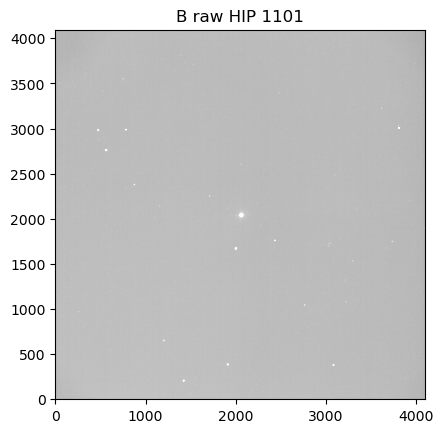

In [75]:
plt.imshow(B_E2raw, cmap='gray', vmin=0, vmax= np.mean(B_E2raw)+ np.std(B_E2raw), origin='lower')
plt.title('B raw HIP 1101')
plt.savefig('B raw HIP 1101')
plt.show()
plt.close()

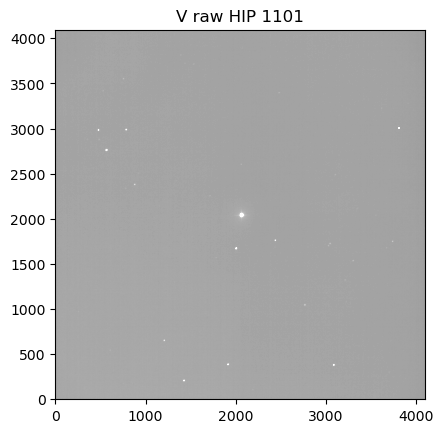

In [76]:
plt.imshow(V_E2raw, cmap='gray', vmin=0, vmax= np.mean(V_E2raw)+ np.std(V_E2raw), origin='lower')
plt.title('V raw HIP 1101')
plt.savefig('V raw HIP 1101')
plt.show()
plt.close()

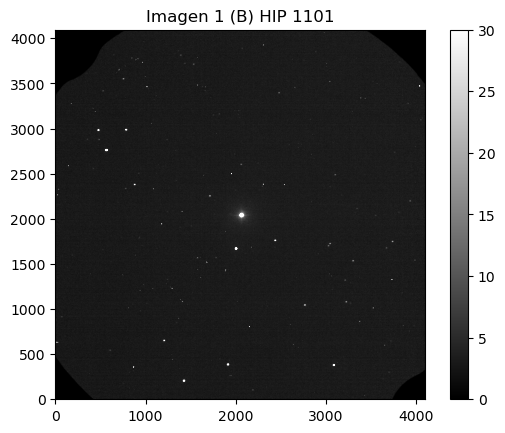

In [81]:
#fig=plt.figure(figsize=(10,10))
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(BE2)

plt.imshow(BE2,vmin=0,vmax=30,cmap='gray',origin='lower')
plt.title('Imagen 1 (B) HIP 1101')
plt.colorbar()
#plt.savefig('B')
plt.show()

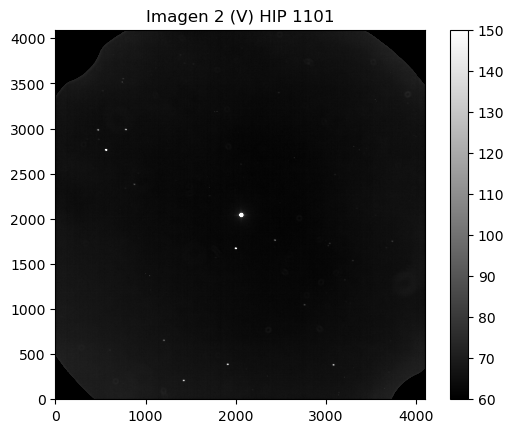

In [82]:
#fig=plt.figure(figsize=(10,10))
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(VE2)

plt.imshow(VE2,vmin=60,vmax=150,cmap='gray',origin='lower')
plt.title('Imagen 2 (V) HIP 1101')
plt.colorbar()
#plt.savefig('B')
plt.show()

# 5. Calibración

### Estrella HIP 277

Filtro B

Primero vemos el header

In [85]:
#Abrimos el fits
imagenE1B = fits.open('Light_Mouse_click_position_B_20.000secs_00000103.fit')[0]
#Extraemos la data y el header
dataE1B = imagenE1B.data
headerE1B = imagenE1B.header
headerE1B

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4096 / length of data axis 1                          
NAXIS2  =                 4096 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBSERVER= 'PUCV    '           / SBIGFITSEXT The name of the observer           
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '        

In [268]:
dataE1B= BE1
thresholdB1 = detect_threshold(dataE1B, nsigma=1)
# Detectamos las fuentes
sourceBE1 = detect_sources(dataE1B, thresholdB1, npixels=50)
sourceBE1

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 87
labels: [ 1  2  3  4  5 ... 83 84 85 86 87]

Generamos un mapa de colores que asocia cada fuente con un color

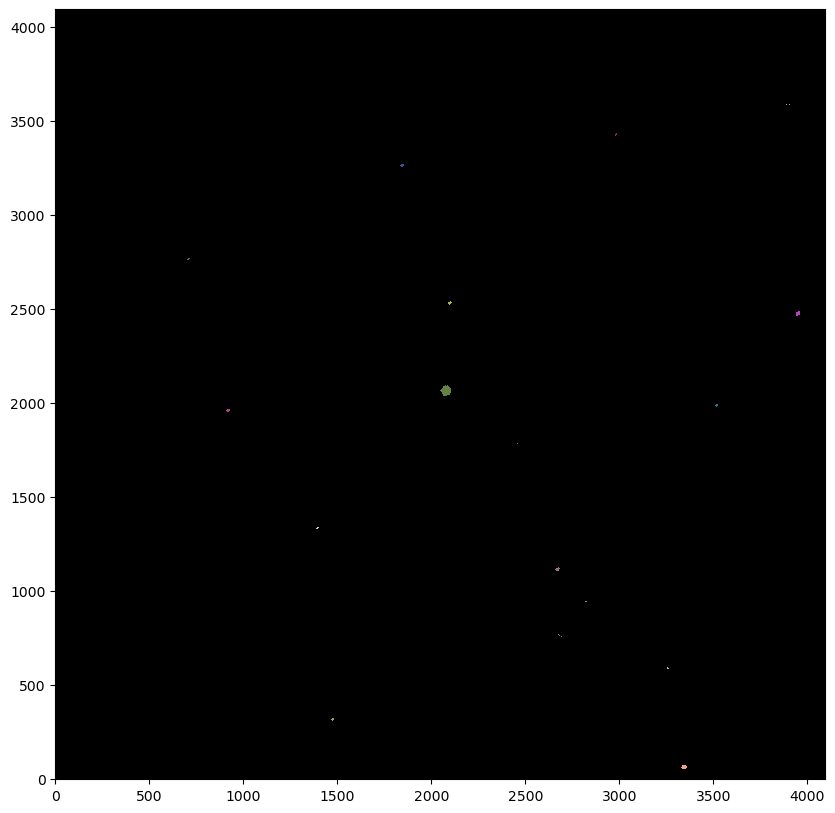

In [269]:
#Generamos un mapa de colores que asocia un color a cada fuente
cmap_sourE1 = sourBE1.make_cmap(seed=123)
#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sourBE1, origin='lower', cmap=cmap_sourE1, interpolation='nearest')
plt.savefig("Mapa de colores HIP 277 Filtro B")
plt.show()

Generamos un catalogo

In [273]:
catalogoE1_B = SourceCatalog(dataE1B, sourceBE1)
tblE1 = catalogoE1_B.to_table()
tablaB_E1 = tblE1['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']

#Dividimos el flujo por el tiempo de exposición
tablaB_E1['segment_flux'] = tablaB_E1['segment_flux']/headerE1B['EXPTIME']
tablaB_E1

<QTable length=87>
label     xcentroid          ycentroid        area     segment_flux   
                                              pix2                    
int64      float64            float64       float64      float64      
----- ------------------ ------------------ ------- ------------------
    1 3346.3020315649023  62.94689813794257  1388.0  4718.657699759196
    2 3067.2189566051375  213.5444301456666   115.0  46.89512176299743
    3 1476.5935014425513  317.1747298120568   455.0  463.5917215830765
    4  797.1469202947527  341.8204378500977   110.0 44.157570323524276
    5 3748.5491160181064 349.48555784493533   154.0  64.67988611285548
    6 1661.0469321169367 359.50910886927704    85.0  32.47794817812742
    7  2514.208186100326  400.9871806067461   198.0  92.93454638294557
    8  3261.803918703521  589.1261334355983   312.0 211.79404055493205
    9  1309.007723161702  634.7560026485686   227.0  117.9181822121875
  ...                ...                ...     ...                ...
   78  3862.135617480241  3215.076283045176   106.0   41.1374035654252
   79 1847.6134147208606 3265.6100920642225   595.0  757.9881781934066
   80 2983.8464243874446  3429.071016574882   420.0 255.84992390003762
   81 3900.7458602502456 3585.6963644085927   116.0 155.99827404341286
   82 3097.2821619545925  3662.192539799721    50.0 18.959406537679712
   83   1281.36800745099  3730.397249271012    81.0  66.82585913475137
   84 3775.8324454399954  3795.206461718021    59.0 123.60067184271254
   85  946.5090934932938  3852.309698464823    88.0 115.04095492348092
   86 3655.6038189954415 3859.4641998878915    53.0  19.95905231648625
   87 1660.2625242205118 4063.4485081696207   148.0  62.63783746203897

Se identifica la fuente con mayor area:

In [274]:
E1_B = np.argmax(tablaB_E1['area'])
tablaB_E1[E1_B]

<Row index=32>
label     xcentroid         ycentroid       area     segment_flux  
                                            pix2                   
int64      float64           float64      float64      float64     
----- ----------------- ----------------- ------- -----------------
   33 2079.412442687261 2066.304623246421 11166.0 92655.35919872808

In [275]:
#Obtenemos su flujo
flujoE1_B = tablaB_E1['segment_flux'][E1_B]
#Calculamos la magnitud medida
mag_E1B = -2.5*np.log(flujoE1_B)
#Obtenemos el zeropoint
zeropointE1_B = 7.708 - mag_E1B
zeropointE1_B

36.29960518380985

Usamos el zeropoint para corroborar la magnitud

In [95]:
tablaB_E1['magnitude'] = zeropointE1_B - 2.5*np.log(tablaB_E1['segment_flux'])
tablaB_E1[E1_B]

<Row index=10>
label     xcentroid          ycentroid        area     segment_flux       magnitude    
                                              pix2                                     
int64      float64            float64       float64      float64           float64     
----- ------------------ ------------------ ------- ----------------- -----------------
   11 2079.4900338230323 2066.4274591115723  2456.0 88721.29199285698 7.707999999999998

Filtro V

Primero abrimos el Header

In [99]:
#Abrimos el fits
imagenE1V = fits.open('Light_Mouse_click_position_V_5.000secs_00000098.fit')[0]
#Extraemos la data y el header
dataE1V = imagenE1V.data
headerE1V = imagenE1V.header
headerE1V

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4096 / length of data axis 1                          
NAXIS2  =                 4096 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBSERVER= 'PUCV    '           / SBIGFITSEXT The name of the observer           
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '        

In [126]:
dataE1V = VE1
threshold = detect_threshold(dataE1V, nsigma=6)
#Detectamos las fuentes
sourceVE1 = detect_sources(dataE1V, threshold, npixels=50)
sourceVE1

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 11
labels: [ 1  2  3  4  5  6  7  8  9 10 11]

Generamos un mapa de colores que asocia cada fuente con un color

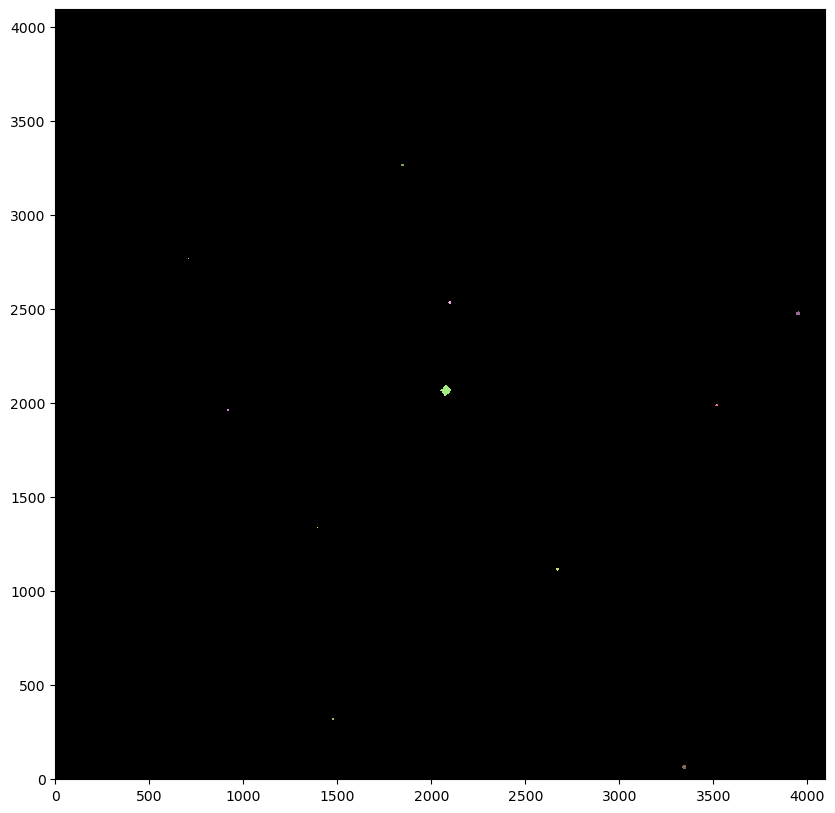

In [127]:
cmap_sourceE1_V = sourceVE1.make_cmap(seed=123)
fig, ax = plt.subplots(1, 1,figsize=(10,10))
ax.imshow(sourceVE1, origin='lower', cmap=cmap_sourceE1_V, interpolation='nearest')
plt.savefig("Mapa de colores HIP 277 Filtro V")
plt.show()

Generamos un catalogo

In [128]:
catalogoV_E1 = SourceCatalog(dataE1V, sourceVE1)
tblV_E1 = catalogoV_E1.to_table()
tablaV_E1 = tblV_E1['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']

#Dividimos el flujo por el tiempo de exposición
tablaV_E1['segment_flux'] = tablaV_E1['segment_flux']/headerE1V['EXPTIME']
tablaV_E1

<QTable length=11>
label     xcentroid          ycentroid        area     segment_flux   
                                              pix2                    
int64      float64            float64       float64      float64      
----- ------------------ ------------------ ------- ------------------
    1  3346.470798487488  63.38890675526496   405.0 17972.558798795595
    2 1477.0402061060422 318.26468336661793   151.0  3101.242328134368
    3  2672.771109293248 1116.4561982130845   223.0   7372.13631821002
    4  1396.032893924522 1336.3760785884842    72.0 1415.9602394015112
    5  920.2380132816292  1961.901664374553   147.0  3332.738724747348
    6   3518.28477698682  1988.496447207314   128.0  2721.920629269668
    7  2079.655853397051 2067.0902800749514  1791.0  551088.9033791285
    8 3952.8234263903723  2475.809878332853   387.0 20158.983889623552
    9 2100.9097663312973  2532.924999562893   210.0  6599.240227190223
   10  708.8006737289919  2766.442087321486    55.0  1056.856563369363
   11   1847.47445512137  3266.351822821505   153.0  3548.017486045166

Se identifica la fuente con mayor area:

In [129]:
E1_V = np.argmax(tablaV_E1['area'])
tablaV_E1[E1_V]

<Row index=6>
label     xcentroid         ycentroid        area     segment_flux  
                                             pix2                   
int64      float64           float64       float64      float64     
----- ----------------- ------------------ ------- -----------------
    7 2079.655853397051 2067.0902800749514  1791.0 551088.9033791285

In [130]:
#Obtenemos su flujo
flujoE1_V = tablaV_E1['segment_flux'][E1_V]
#Calculamos la magnitud medida
mag_E1V = -2.5*np.log(flujoE1_V)
#Obtenemos el zeropoint
zeropointE1_V = 7.541 - mag_E1V
zeropointE1_V

40.59012856066275

In [131]:
#Usamos el zeropoint para obtener la magnitud calibrada
tablaV_E1['magnitude'] = zeropointE1_V - 2.5*np.log(tablaV_E1['segment_flux'])
tablaV_E1[E1_V]

<Row index=6>
label     xcentroid         ycentroid        area     segment_flux       magnitude    
                                             pix2                                     
int64      float64           float64       float64      float64           float64     
----- ----------------- ------------------ ------- ----------------- -----------------
    7 2079.655853397051 2067.0902800749514  1791.0 551088.9033791285 7.540999999999997

### Estrella HIP 1101

Filtro B

Primero vemos el Header

In [132]:
#Abrimos el fits
imagenE2B = fits.open('Light_Mouse_click_position_B_20.000secs_00000116.fit')[0]
#Extraemos la data y el header
dataE2B = imagenE2B.data
headerE2B = imagenE2B.header
headerE2B

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4096 / length of data axis 1                          
NAXIS2  =                 4096 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBSERVER= 'PUCV    '           / SBIGFITSEXT The name of the observer           
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '        

In [133]:
dataE2B= BE2
threshold = detect_threshold(dataE2B, nsigma=5)
#Detectamos las fuentes
sourceBE2 = detect_sources(dataE2B, threshold, npixels=50)
sourceBE2

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 19
labels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]

Generamos un mapa de colores que asocia cada fuente con un color

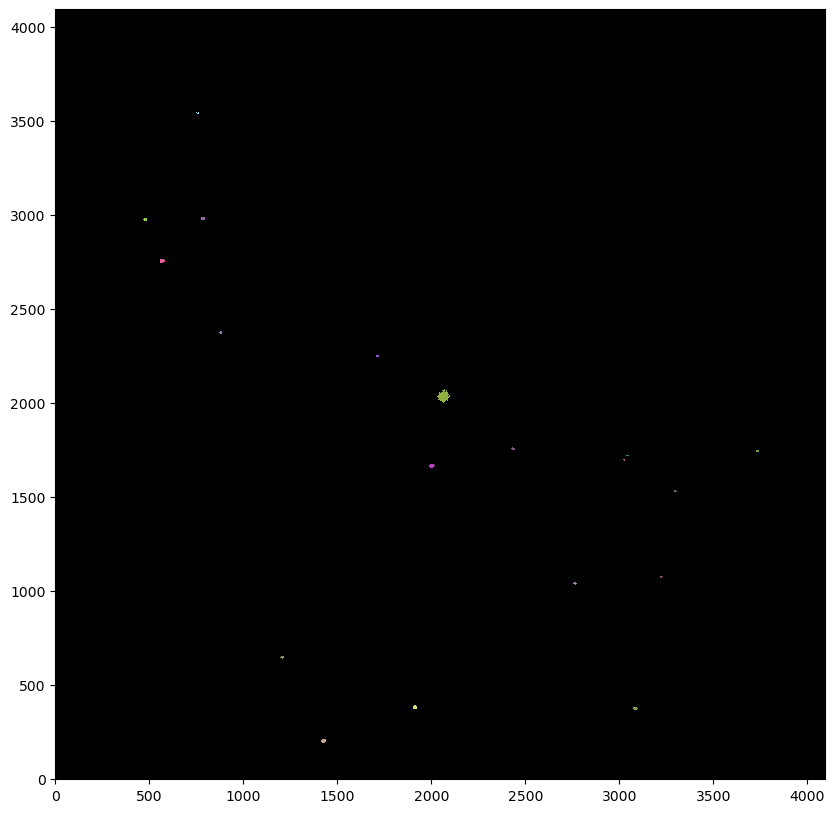

In [134]:
cmap_sourE2 = sourceBE2.make_cmap(seed=123)
fig, ax = plt.subplots(1, 1,figsize=(10,10))
ax.imshow(sourceBE2, origin='lower', cmap=cmap_sourE2, interpolation='nearest')
plt.savefig("Mapa de colores HIP 1101 Filtro B")
plt.show()

Generamos un catalogo

In [135]:
catalogoE2_B = SourceCatalog(dataE2B, sourceBE2)
tblE2 = catalogoE2_B.to_table()
tablaB_E2 = tblE2['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
#Dividimos el flujo por el tiempo de exposición 
tablaB_E2['segment_flux'] = tablaB_E2['segment_flux']/headerE2B['EXPTIME']
tablaB_E2

<QTable length=19>
label     xcentroid          ycentroid        area     segment_flux   
                                              pix2                    
int64      float64            float64       float64      float64      
----- ------------------ ------------------ ------- ------------------
    1 1428.1450247448993  203.2312959614706   416.0  1610.096518698282
    2  3086.571194159106  375.5800821733441   349.0  942.9795497509722
    3 1915.3552605010746 382.02731542306407   393.0 1457.8836381491815
    4 1208.6080654467892  647.8799959279155   233.0 405.90226292239885
    5 2766.4270656989247 1040.4394000920952   187.0  281.4772132068803
    6 3224.7722536997503  1076.025905374951   113.0   128.170249105971
    7 3300.3154688477566   1530.19575199037   103.0 120.97184012661901
    8  2004.836719753361 1665.7137633789084   487.0 3036.2500660015635
    9  3028.673715889685 1696.7689522332066    57.0  56.79313731163362
   10  3045.448485115924 1720.6107235232455   112.0  126.0125491980671
   11 3737.3072122714902 1744.2985773753542   116.0  137.0565480897749
   12  2438.260554125827 1756.1789775517027   239.0 492.04614721617173
   13  2065.462603827563 2034.8954166959047  2773.0  66585.93658752355
   14 1715.0276736479875  2248.426799521755   146.0 185.40130606418808
   15  882.0502350586072 2374.5757711908223   200.0  339.3669277865175
   16  569.5255276999053 2755.2556975252114   470.0 2730.7001364837342
   17   480.804118071356  2976.524713634703   302.0  810.3189078149724
   18  788.0720996752644 2981.0023348344735   304.0  770.2767881148914
   19  758.6264869512163   3545.07941390078   103.0 112.85956610658604

Se identifica la fuente con mayor area:

In [136]:
E2_B = np.argmax(tablaB_E2['area'])
tablaB_E2[E2_B]

<Row index=12>
label     xcentroid         ycentroid        area     segment_flux  
                                             pix2                   
int64      float64           float64       float64      float64     
----- ----------------- ------------------ ------- -----------------
   13 2065.462603827563 2034.8954166959047  2773.0 66585.93658752355

In [137]:
#Flujo
flujoE2_B = tablaB_E2['segment_flux'][E2_B]
#Calculamos la magnitud
mag_E2B = -2.5*np.log(flujoE2_B)
#Obtenemos el zeropoint
zeropointE2_B = 10.316 - mag_E2B
zeropointE2_B

38.08162167970269

In [138]:
#Usamos el zeropoint para obtener la magnitud calibrada
tablaB_E2['magnitude'] = zeropointE2_B - 2.5*np.log(tablaB_E2['segment_flux'])
tablaB_E2[E2_B]

<Row index=12>
label     xcentroid         ycentroid        area     segment_flux       magnitude     
                                             pix2                                      
int64      float64           float64       float64      float64           float64      
----- ----------------- ------------------ ------- ----------------- ------------------
   13 2065.462603827563 2034.8954166959047  2773.0 66585.93658752355 10.316000000000003

Filtro V

Primero vemos el Header

In [139]:
#Abrimos el fits
imagenE2V = fits.open('Light_Mouse_click_position_V_5.000secs_00000111.fit')[0]
#Extraemos la data y el header
dataE2V = imagenE2V.data
headerE2V = imagenE2V.header
headerE2V

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4096 / length of data axis 1                          
NAXIS2  =                 4096 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBSERVER= 'PUCV    '           / SBIGFITSEXT The name of the observer           
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '        

In [141]:
dataE2V = VE2
threshold = detect_threshold(dataE2V, nsigma=6)
#Detectamos las fuentes
sourceVE2 = detect_sources(dataE2V, threshold, npixels=50)
sourceVE2

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 12
labels: [ 1  2  3  4  5  6  7  8  9 10 11 12]

Generamos un mapa de colores que asocia cada fuente con un color

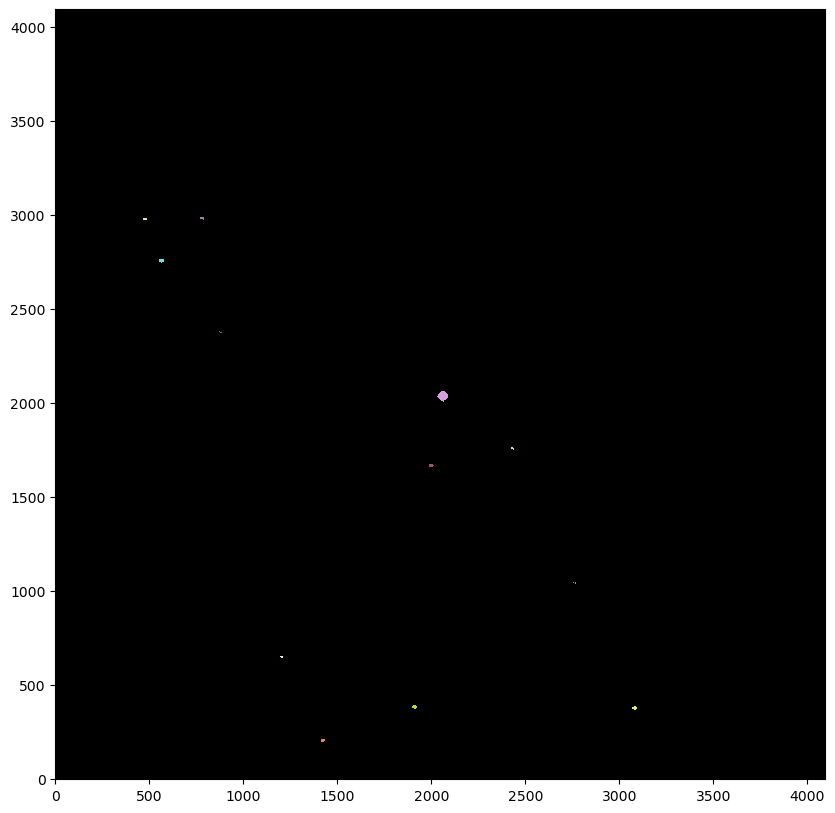

In [260]:
cmap_sourceE2_V = sourceVE2.make_cmap(seed=123)
fig, ax = plt.subplots(1, 1,figsize=(10,10))
ax.imshow(sourceVE2, origin='lower', cmap=cmap_sourceE2_V, interpolation='nearest')
plt.savefig("Mapa de colores HIP 1101 Filtro V")
plt.show()

Generamos un catalogo

In [143]:
catalogoE2_V = SourceCatalog(dataE2V, sourceVE2)
tblE2V = catalogoE2_V.to_table()
tablaV_E2 = tblE2V['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']

#Dividimos el "flujo" por el tiempo de exposición 
tablaV_E2['segment_flux'] = tablaV_E2['segment_flux']/headerE2V['EXPTIME']
tablaV_E2

<QTable length=12>
label     xcentroid          ycentroid        area     segment_flux   
                                              pix2                    
int64      float64            float64       float64      float64      
----- ------------------ ------------------ ------- ------------------
    1 1424.5963059794167 204.93787607072053   333.0   8223.59424304336
    2 3083.0249745186334 377.37390699934747   309.0  7494.010297644575
    3 1911.9815577775223  383.7855923697654   332.0  8592.071557010557
    4 1205.7674762311958  649.8740562430571   183.0  3710.840894999771
    5 2763.8619659175974 1042.3110911227882    85.0 1588.8938120940002
    6  2001.595878781711 1667.6857372201112   391.0 13735.990592531063
    7  2435.114820732402  1758.179240251176   184.0 3944.1014159430624
    8 2062.6280988433346 2037.0303590423925  2195.0  555704.4663217571
    9  879.8772805822911 2376.6605009825544   116.0 2229.1310926048386
   10  565.9812562902631  2757.244697440372   467.0 16723.602749152673
   11 477.35060831069103 2978.5558777441706   260.0 6003.6053114376555
   12  784.3440009464948 2982.9969996100403   294.0   6989.34196186485

Se identifica la fuente con mayor área:

In [144]:
E2_V = np.argmax(tablaV_E2['area'])
tablaV_E2[E2_V]

<Row index=7>
label     xcentroid          ycentroid        area     segment_flux  
                                              pix2                   
int64      float64            float64       float64      float64     
----- ------------------ ------------------ ------- -----------------
    8 2062.6280988433346 2037.0303590423925  2195.0 555704.4663217571

In [145]:
#flujo
flujoE2_V = tablaV_E2['segment_flux'][E2_V]
#Magnitud medida
mag_E2V = -2.5*np.log(flujoE2_V)
#Obtenemos el zeropoint
zeropointE2_V = 9.602 - mag_E2V
zeropointE2_V

42.67197974131295

In [146]:
#Usamos el zeropoint para obtener la magnitud calibrada
tablaV_E2['magnitude'] = zeropointE2_V - 2.5*np.log(tablaV_E2['segment_flux'])
tablaV_E2[E2_V]

<Row index=7>
label     xcentroid          ycentroid        area     segment_flux       magnitude    
                                              pix2                                     
int64      float64            float64       float64      float64           float64     
----- ------------------ ------------------ ------- ----------------- -----------------
    8 2062.6280988433346 2037.0303590423925  2195.0 555704.4663217571 9.602000000000004

# 6. Catálogo 

## ZERO POINT B 

### Sin deblend

Primero vemos el Header

In [195]:
#Abrimos el fits
imagen1 = fits.open('Light_Mouse_click_position_B_900.000secs_00000051.fit')[0]
#Extraemos la data y el header
data1 = imagen1.data
header1 = imagen1.header
header1

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4096 / length of data axis 1                          
NAXIS2  =                 4096 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBSERVER= 'PUCV    '           / SBIGFITSEXT The name of the observer           
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '        

In [248]:
data = B
threshold = detect_threshold(data, nsigma=1)
#Detectamos las fuentes
sourceNGC55B = detect_sources(data, threshold, npixels=10)
sourceNGC55B

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 17730
labels: [    1     2     3     4     5 ... 17726 17727 17728 17729 17730]

Generamos un mapa de colores que asocia cada fuente con un color

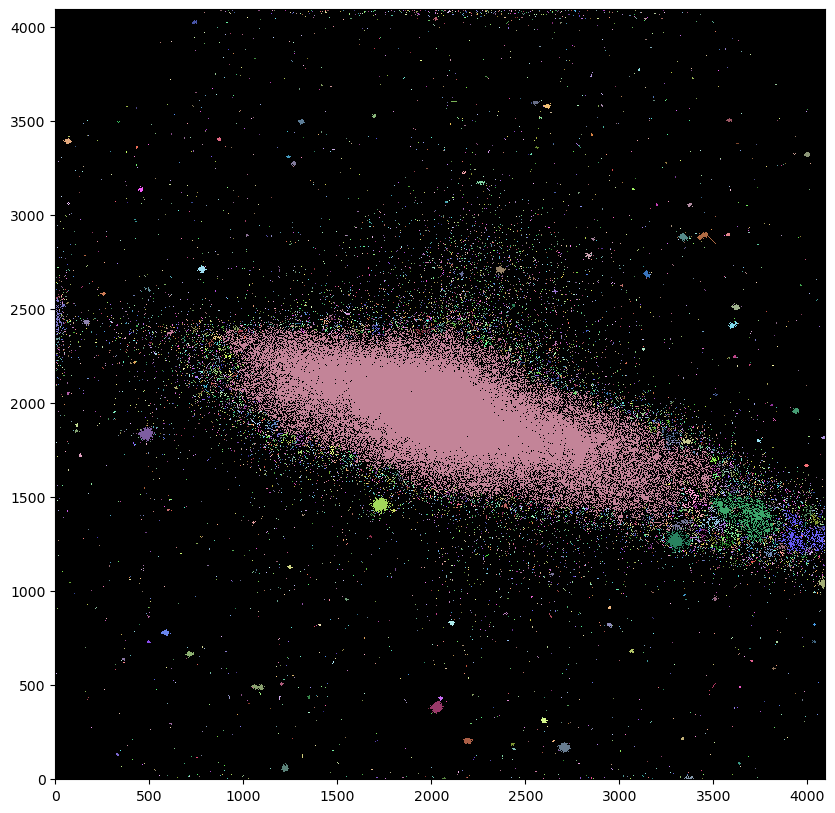

In [259]:
cmap_sourceNGC55_B = sourceNGC55B.make_cmap(seed=123)
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sourceNGC55B, origin='lower', cmap=cmap_sourceNGC55_B, interpolation='nearest')
plt.show()

In [256]:
catalogoNGC55_B = SourceCatalog(data, sourceNGC55B)
tbl = catalogoNGC55_B.to_table()
tablaNGC55B = tbl['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
#Dividimos el "flujo" por el tiempo de exposición
tablaNGC55B['segment_flux'] = tablaNGC55B['segment_flux']/header1['EXPTIME']
tablaNGC55B

<QTable length=17730>
label     xcentroid          ycentroid        area       segment_flux     
                                              pix2                        
int64      float64            float64       float64        float64        
----- ------------------ ------------------ ------- ----------------------
    1  446.0752784888233   1.47326495941564    10.0  2.700212943975898e-21
    2  754.5126174830508 1.5429168916657938    12.0  3.250744508162162e-21
    3 1028.0206129294334 1.5675543098471447    11.0 2.8511067437232776e-21
    4 1573.7854460086091   1.27981505073712    10.0 3.8830100339581336e-21
    5 1757.9420937149623 2.1678819328455465    10.0  2.605376079545062e-21
    6 1935.7264344281855 3.0600982790542677    10.0  2.612455899148991e-21
    7  2067.645445643953  3.135763316862518   106.0 2.8986294451105717e-20
    8 2303.1035388717673 3.2532747425028075    10.0 2.6219630316287802e-21
    9 2343.1178421330087 2.5359424236005106    14.0 3.7145671640793664e-21
  ...                ...                ...     ...                    ...
17721 3286.2559916248965 4091.9720470549596    13.0 3.4465496046916726e-21
17722 3357.2911479580343 4092.8497484881977    12.0 3.0524477440002013e-21
17723 1106.8054256996277  4093.742234321731    12.0   4.85327232271003e-21
17724 1286.3887048067688  4093.173186572807    11.0 2.8515778665350396e-21
17725  1585.252348657247   4093.80538905756    10.0 2.5605148309966288e-21
17726 1708.9021413411738 4093.6310992449785    10.0 2.5561857693089444e-21
17727 1816.1058531419721 4093.3029118275213    10.0 2.4547836228197393e-21
17728 2308.8963840959054  4093.249146914044    12.0 2.9614597574624696e-21
17729 2808.6679809402676   4093.33561006409    12.0  2.957390538869541e-21
17730 2833.5811130262628  4093.899649150261    13.0 3.2711519515994485e-21

Flujo con respecto a estrella HIP 277

In [283]:
tablaNGC55B['magnitude'] = zeropointE1_B - 2.5*np.log(tablaNGC55B['segment_flux'])
tablaNGC55B

<QTable length=17730>
label     xcentroid      ...      segment_flux          magnitude     
                         ...                                          
int64      float64       ...        float64              float64      
----- ------------------ ... ---------------------- ------------------
    1  446.0752784888233 ...  2.700212943975898e-21  154.7019959708983
    2  754.5126174830508 ...  3.250744508162162e-21 154.23811244214357
    3 1028.0206129294334 ... 2.8511067437232776e-21 154.56605444092096
    4 1573.7854460086091 ... 3.8830100339581336e-21 153.79379597894754
    5 1757.9420937149623 ...  2.605376079545062e-21 154.79137998316563
    6 1935.7264344281855 ...  2.612455899148991e-21 154.78459572489743
    7  2067.645445643953 ... 2.8986294451105717e-20 148.76826478314928
    8 2303.1035388717673 ... 2.6219630316287802e-21 154.77551435114827
    9 2343.1178421330087 ... 3.7145671640793664e-21 153.90466716339768
  ...                ... ...                    ...                ...
17721 3286.2559916248965 ... 3.4465496046916726e-21 154.09188852596512
17722 3357.2911479580343 ... 3.0524477440002013e-21  154.3954630465634
17723 1106.8054256996277 ...   4.85327232271003e-21 153.23618960811916
17724 1286.3887048067688 ... 2.8515778665350396e-21 154.56564136984565
17725  1585.252348657247 ... 2.5605148309966288e-21  154.8348017056711
17726 1708.9021413411738 ... 2.5561857693089444e-21  154.8390320320658
17727 1816.1058531419721 ... 2.4547836228197393e-21 154.94022601595262
17728 2308.8963840959054 ... 2.9614597574624696e-21  154.4711167958053
17729 2808.6679809402676 ...  2.957390538869541e-21  154.4745543039617
17730 2833.5811130262628 ... 3.2711519515994485e-21 154.22246706187187

In [284]:
NGC55B = np.argmax(tablaNGC55B['area']) 
mag_aparente_BE1 = tablaNGC55B['magnitude'][NGC55B]
mag_aparente_BE1

125.56512268426289

FLUJO ESTRELLA HIP1101

In [285]:
tablaNGC55B['magnitude'] = zeropointE2_B - 2.5*np.log(tablaNGC55B['segment_flux'])
tablaNGC55B

<QTable length=17730>
label     xcentroid      ...      segment_flux          magnitude     
                         ...                                          
int64      float64       ...        float64              float64      
----- ------------------ ... ---------------------- ------------------
    1  446.0752784888233 ...  2.700212943975898e-21 156.48401246679117
    2  754.5126174830508 ...  3.250744508162162e-21  156.0201289380364
    3 1028.0206129294334 ... 2.8511067437232776e-21  156.3480709368138
    4 1573.7854460086091 ... 3.8830100339581336e-21  155.5758124748404
    5 1757.9420937149623 ...  2.605376079545062e-21 156.57339647905846
    6 1935.7264344281855 ...  2.612455899148991e-21 156.56661222079026
    7  2067.645445643953 ... 2.8986294451105717e-20  150.5502812790421
    8 2303.1035388717673 ... 2.6219630316287802e-21  156.5575308470411
    9 2343.1178421330087 ... 3.7145671640793664e-21  155.6866836592905
  ...                ... ...                    ...                ...
17721 3286.2559916248965 ... 3.4465496046916726e-21 155.87390502185795
17722 3357.2911479580343 ... 3.0524477440002013e-21 156.17747954245624
17723 1106.8054256996277 ...   4.85327232271003e-21   155.018206104012
17724 1286.3887048067688 ... 2.8515778665350396e-21 156.34765786573848
17725  1585.252348657247 ... 2.5605148309966288e-21 156.61681820156394
17726 1708.9021413411738 ... 2.5561857693089444e-21 156.62104852795864
17727 1816.1058531419721 ... 2.4547836228197393e-21 156.72224251184545
17728 2308.8963840959054 ... 2.9614597574624696e-21 156.25313329169813
17729 2808.6679809402676 ...  2.957390538869541e-21 156.25657079985456
17730 2833.5811130262628 ... 3.2711519515994485e-21  156.0044835577647

In [286]:
NGC55 = np.argmax(tablaNGC55B['area']) 
mag_aparente_BE2 = tablaNGC55B['magnitude'][NGC55B]
mag_aparente_BE2

127.34713918015574

### Deblend 

In [156]:
#Usamos la 'deblend_sources' para separar las fuentes
source_deblendB = deblend_sources(data, sourceNGC55B, npixels=10, nlevels=2 ,contrast=0)
source_deblendB 

Deblending:   0%|          | 0/5089 [00:00<?, ?it/s]

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 17732
labels: [    1     2     3     4     5 ... 17728 17729 17730 17731 17732]

Volvemos a generar el mapa de colores

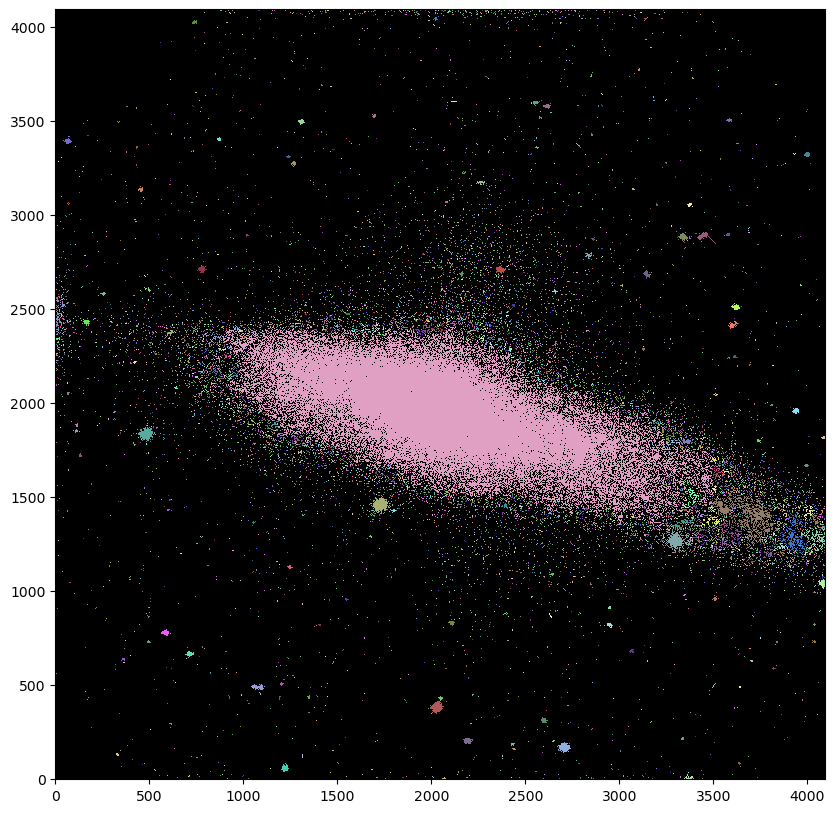

In [157]:
cmap_deblendB = source_deblendB.make_cmap(seed=150)
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(source_deblendB, origin='lower', cmap=cmap_deblendB,interpolation='nearest')
plt.show()

Generamos el catalogo

In [159]:
catalogoNGC55_B = SourceCatalog(data, source_deblendB)
tbl = catalogoNGC55_B.to_table()
tablaNGC55B_d = tbl['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
#Dividimos el "flujo" por el tiempo de exposición
tablaNGC55B_d['segment_flux'] = tablaNGC55B_d['segment_flux']/header1['EXPTIME']
tablaNGC55B_d

<QTable length=17732>
label     xcentroid          ycentroid        area       segment_flux     
                                              pix2                        
int64      float64            float64       float64        float64        
----- ------------------ ------------------ ------- ----------------------
    1  446.0752784888233   1.47326495941564    10.0  2.700212943975898e-21
    2  754.5126174830508 1.5429168916657938    12.0  3.250744508162162e-21
    3 1028.0206129294334 1.5675543098471447    11.0 2.8511067437232776e-21
    4 1573.7854460086091   1.27981505073712    10.0 3.8830100339581336e-21
    5 1757.9420937149623 2.1678819328455465    10.0  2.605376079545062e-21
    6 1935.7264344281855 3.0600982790542677    10.0  2.612455899148991e-21
    7  2067.645445643953  3.135763316862518   106.0 2.8986294451105717e-20
    8 2303.1035388717673 3.2532747425028075    10.0 2.6219630316287802e-21
    9 2343.1178421330087 2.5359424236005106    14.0 3.7145671640793664e-21
  ...                ...                ...     ...                    ...
17723  1585.252348657247   4093.80538905756    10.0 2.5605148309966288e-21
17724 1708.9021413411738 4093.6310992449785    10.0 2.5561857693089444e-21
17725 1816.1058531419721 4093.3029118275213    10.0 2.4547836228197393e-21
17726 2308.8963840959054  4093.249146914044    12.0 2.9614597574624696e-21
17727 2808.6679809402676   4093.33561006409    12.0  2.957390538869541e-21
17728 2833.5811130262628  4093.899649150261    13.0 3.2711519515994485e-21
17729 1066.5853902664703 1099.0512438732937    33.0  9.949610137759886e-21
17730 1071.5922077182063  1108.762434728366    42.0 1.2197052900883365e-20
17731 2401.9787809302998  4019.253296966208    46.0 1.3606077084912933e-20
17732  2410.906575791362  4028.127503061115    56.0 1.6144352919987227e-20

FLUJO ESTRELLA HIP 277

In [160]:
d1E1 = tablaNGC55B_d
d1E1['magnitude'] = zeropointE1_B - 2.5*np.log(d1E1['segment_flux'])
d1E1

<QTable length=17732>
label     xcentroid      ...      segment_flux          magnitude     
                         ...                                          
int64      float64       ...        float64              float64      
----- ------------------ ... ---------------------- ------------------
    1  446.0752784888233 ...  2.700212943975898e-21  154.5935287483554
    2  754.5126174830508 ...  3.250744508162162e-21 154.12964521960066
    3 1028.0206129294334 ... 2.8511067437232776e-21 154.45758721837802
    4 1573.7854460086091 ... 3.8830100339581336e-21 153.68532875640463
    5 1757.9420937149623 ...  2.605376079545062e-21 154.68291276062268
    6 1935.7264344281855 ...  2.612455899148991e-21 154.67612850235452
    7  2067.645445643953 ... 2.8986294451105717e-20 148.65979756060636
    8 2303.1035388717673 ... 2.6219630316287802e-21 154.66704712860536
    9 2343.1178421330087 ... 3.7145671640793664e-21 153.79619994085476
  ...                ... ...                    ...                ...
17723  1585.252348657247 ... 2.5605148309966288e-21  154.7263344831282
17724 1708.9021413411738 ... 2.5561857693089444e-21  154.7305648095229
17725 1816.1058531419721 ... 2.4547836228197393e-21 154.83175879340968
17726 2308.8963840959054 ... 2.9614597574624696e-21  154.3626495732624
17727 2808.6679809402676 ...  2.957390538869541e-21 154.36608708141878
17728 2833.5811130262628 ... 3.2711519515994485e-21 154.11399983932893
17729 1066.5853902664703 ...  9.949610137759886e-21 151.33302192278387
17730 1071.5922077182063 ... 1.2197052900883365e-20 150.82386945081385
17731 2401.9787809302998 ... 1.3606077084912933e-20 150.55056399991525
17732  2410.906575791362 ... 1.6144352919987227e-20  150.1229295331425

Se identifica la fuente de mayor área, o sea la Galaxia.

In [161]:
NGC55_D1 = np.argmax(d1E1['area']) 

#MAGNITUD APARENTE
mag_deblend_BE1 = d1E1['magnitude'][NGC55_D1] # buscamos el flujo de "estrella" (el flujo de aquella fuente con mayor area)
mag_deblend_BE1

125.45665546171998

FLUJO ESTRELLA HIP1101

In [162]:
d1E2 = tablaNGC55B_d
d1E2['magnitude'] = zeropointE2_B - 2.5*np.log(d1E2['segment_flux'])
d1E2

<QTable length=17732>
label     xcentroid      ...      segment_flux          magnitude     
                         ...                                          
int64      float64       ...        float64              float64      
----- ------------------ ... ---------------------- ------------------
    1  446.0752784888233 ...  2.700212943975898e-21 156.48401246679117
    2  754.5126174830508 ...  3.250744508162162e-21  156.0201289380364
    3 1028.0206129294334 ... 2.8511067437232776e-21  156.3480709368138
    4 1573.7854460086091 ... 3.8830100339581336e-21  155.5758124748404
    5 1757.9420937149623 ...  2.605376079545062e-21 156.57339647905846
    6 1935.7264344281855 ...  2.612455899148991e-21 156.56661222079026
    7  2067.645445643953 ... 2.8986294451105717e-20  150.5502812790421
    8 2303.1035388717673 ... 2.6219630316287802e-21  156.5575308470411
    9 2343.1178421330087 ... 3.7145671640793664e-21  155.6866836592905
  ...                ... ...                    ...                ...
17723  1585.252348657247 ... 2.5605148309966288e-21 156.61681820156394
17724 1708.9021413411738 ... 2.5561857693089444e-21 156.62104852795864
17725 1816.1058531419721 ... 2.4547836228197393e-21 156.72224251184545
17726 2308.8963840959054 ... 2.9614597574624696e-21 156.25313329169813
17727 2808.6679809402676 ...  2.957390538869541e-21 156.25657079985456
17728 2833.5811130262628 ... 3.2711519515994485e-21  156.0044835577647
17729 1066.5853902664703 ...  9.949610137759886e-21 153.22350564121965
17730 1071.5922077182063 ... 1.2197052900883365e-20  152.7143531692496
17731 2401.9787809302998 ... 1.3606077084912933e-20   152.441047718351
17732  2410.906575791362 ... 1.6144352919987227e-20 152.01341325157824

In [163]:
#magnitud aparente 
mag_deblend_BE2 = d1E2['magnitude'][NGC55_D1]
mag_deblend_BE2

127.34713918015574

## ZERO POINT V

### Sin deblend

Primero vemos el Header

In [164]:
#Abrimos el fits
imagen2 = fits.open('Light_Mouse_click_position_V_600.000secs_00000048.fit')[0]
#Extraemos la data y el header
data2 = imagen2.data
header2 = imagen2.header
header2

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4096 / length of data axis 1                          
NAXIS2  =                 4096 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBSERVER= 'PUCV    '           / SBIGFITSEXT The name of the observer           
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '        

In [165]:
data = V
#Obtenemos el "umbral" que utilizaremos para detectar las fuentes
threshold = detect_threshold(data, nsigma=1)
#Utilizamos el umbral y la imagen para detectar fuentes
sourceNGC55V = detect_sources(data, threshold, npixels=10)
#Mostramos el número de fuentes detectadas
sourceNGC55V

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 9416
labels: [   1    2    3    4    5 ... 9412 9413 9414 9415 9416]

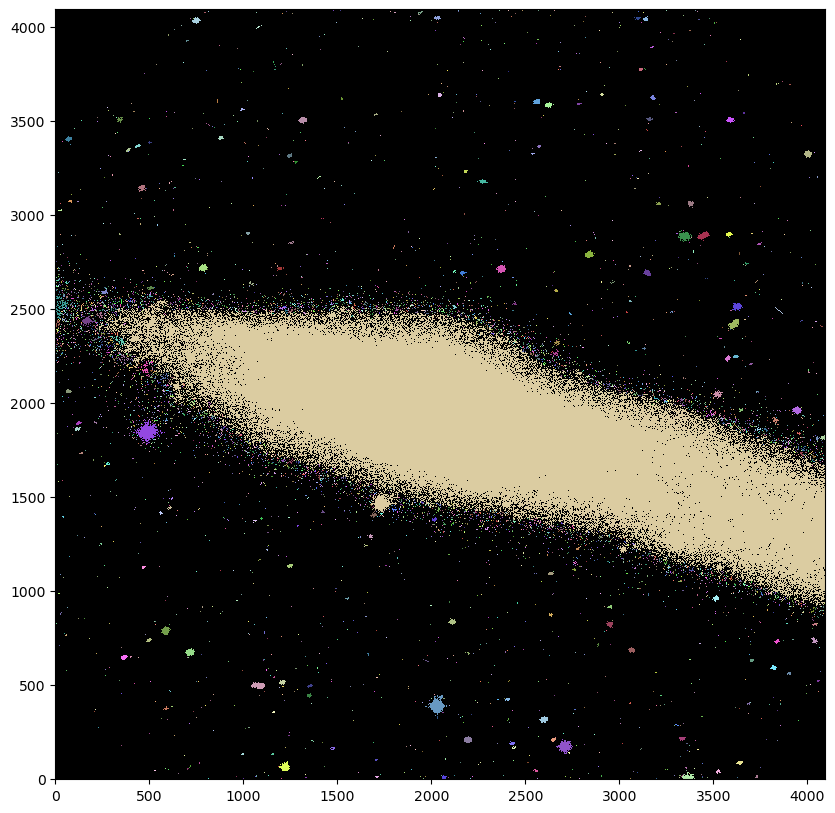

In [166]:
#Mapa de colores que asocia un color a cada fuente
cmap_sourceV = sourceNGC55V.make_cmap(seed=150)
#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sourceNGC55V, origin='lower', cmap=cmap_sourceV, interpolation='nearest')
plt.show()

In [168]:
#Obtenemos el catálogo
catalogoNGC55_V = SourceCatalog(data, sourceNGC55V)
#Lo pasamos a tabla y lo mostramos
tbl = catalogoNGC55_V.to_table()
tablaNGC55V = tbl['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
#Dividimos el "flujo" por el tiempo de exposición
tablaNGC55V['segment_flux'] = tablaNGC55V['segment_flux']/header2['EXPTIME']
tablaNGC55V

<QTable length=9416>
label     xcentroid          ycentroid        area     segment_flux   
                                              pix2                    
int64      float64            float64       float64      float64      
----- ------------------ ------------------ ------- ------------------
    1 1205.5260584129996  1.973335574970079    10.0 1.8010716951662502
    2 1332.8693682765722  7.625313026211944    49.0  19.14687206087803
    3 1957.9711228619929 2.3720334248166197    25.0  6.085372933980455
    4  2069.784011725436  8.354561828582987   395.0  69.52885472892446
    5 2565.5390289137426 1.7857720354903126    10.0 1.7762662280455357
    6  2789.032578311719  0.795488402910669    13.0 3.2560576110550636
    7  3060.780341932893 2.0604502610274267    13.0  8.310122457654069
    8 3068.3373345280997 4.0522055672228126    15.0  2.428123206515133
    9 3366.5201991109807 7.7944976970748385  1407.0  431.0879028317881
  ...                ...                ...     ...                ...
 9407 3135.9302220185036  4091.670907270991    11.0  3.516338146703253
 9408 1192.4828529625586  4092.785362306374    12.0  2.191624572510926
 9409 1870.6763440829197 4092.5658333312126    10.0  2.740590402174141
 9410 1959.5582956696992 4093.6335114397684    15.0  5.955011341197754
 9411 2011.2573218268237  4093.478208482913    11.0   1.95711572553978
 9412  2999.351808681841 4092.9612649861597    11.0 1.6970152579126192
 9413  3165.419995735446 4092.4769894137553    11.0  1.760418927119302
 9414  3362.731967526953 4094.2057565730415    12.0  2.163060801953004
 9415 3373.3653082143305  4093.678271988464    12.0  2.399456407277944
 9416 1800.1212470990638  4094.472524175973    10.0 1.4479185482474841

ESTRELLA HIP 277

In [169]:
tablaNGC55V['magnitude'] = zeropointE1_V - 2.5*np.log(tablaNGC55V['segment_flux'])
tablaNGC55V

<QTable length=9416>
label     xcentroid      ...    segment_flux        magnitude     
                         ...                                      
int64      float64       ...      float64            float64      
----- ------------------ ... ------------------ ------------------
    1 1205.5260584129996 ... 1.8010716951662502 39.119173875828885
    2 1332.8693682765722 ...  19.14687206087803  33.20978015209308
    3 1957.9711228619929 ...  6.085372933980455  36.07540853069679
    4  2069.784011725436 ...  69.52885472892446  29.98577395475074
    5 2565.5390289137426 ... 1.7762662280455357  39.15384471937672
    6  2789.032578311719 ... 3.2560576110550636 37.638835706170894
    7  3060.780341932893 ...  8.310122457654069  35.29644269831632
    8 3068.3373345280997 ...  2.428123206515133  38.37233202080261
    9 3366.5201991109807 ...  431.0879028317881 25.424348510176717
  ...                ... ...                ...                ...
 9407 3135.9302220185036 ...  3.516338146703253 37.446578188434856
 9408 1192.4828529625586 ...  2.191624572510926   38.6285208537818
 9409 1870.6763440829197 ...  2.740590402174141  38.06969512957635
 9410 1959.5582956696992 ...  5.955011341197754    36.129545792441
 9411 2011.2573218268237 ...   1.95711572553978 38.911449008613275
 9412  2999.351808681841 ... 1.6970152579126192  39.26795111736012
 9413  3165.419995735446 ...  1.760418927119302  39.17624904191646
 9414  3362.731967526953 ...  2.163060801953004 38.661317919196556
 9415 3373.3653082143305 ...  2.399456407277944 38.402023023832584
 9416 1800.1212470990638 ... 1.4479185482474841 39.664810957735085

In [171]:
# Galaxia, que es la fuente con mayor area
NGC55V = np.argmax(tablaNGC55V['area']) 
mag_aparente_VE1 = tablaNGC55V['magnitude'][NGC55V]
mag_aparente_VE1

7.653354368720862

Flujo con respectro a la estrella HIP 1101

In [172]:
tablaNGC55V['magnitude'] = zeropointE2_V - 2.5*np.log(tablaNGC55V['segment_flux'])
tablaNGC55V

<QTable length=9416>
label     xcentroid      ...    segment_flux        magnitude     
                         ...                                      
int64      float64       ...      float64            float64      
----- ------------------ ... ------------------ ------------------
    1 1205.5260584129996 ... 1.8010716951662502  41.20102505647909
    2 1332.8693682765722 ...  19.14687206087803 35.291631332743286
    3 1957.9711228619929 ...  6.085372933980455 38.157259711346995
    4  2069.784011725436 ...  69.52885472892446 32.067625135400945
    5 2565.5390289137426 ... 1.7762662280455357 41.235695900026926
    6  2789.032578311719 ... 3.2560576110550636   39.7206868868211
    7  3060.780341932893 ...  8.310122457654069 37.378293878966524
    8 3068.3373345280997 ...  2.428123206515133 40.454183201452814
    9 3366.5201991109807 ...  431.0879028317881  27.50619969082692
  ...                ... ...                ...                ...
 9407 3135.9302220185036 ...  3.516338146703253  39.52842936908506
 9408 1192.4828529625586 ...  2.191624572510926 40.710372034432005
 9409 1870.6763440829197 ...  2.740590402174141  40.15154631022656
 9410 1959.5582956696992 ...  5.955011341197754 38.211396973091205
 9411 2011.2573218268237 ...   1.95711572553978  40.99330018926348
 9412  2999.351808681841 ... 1.6970152579126192 41.349802298010324
 9413  3165.419995735446 ...  1.760418927119302  41.25810022256667
 9414  3362.731967526953 ...  2.163060801953004  40.74316909984676
 9415 3373.3653082143305 ...  2.399456407277944  40.48387420448279
 9416 1800.1212470990638 ... 1.4479185482474841  41.74666213838529

In [173]:
NGC55V = np.argmax(tablaNGC55V['area']) 
mag_aparente_VE2 = tablaNGC55V['magnitude'][NGC55V]
mag_aparente_VE2

9.735205549371067

### Deblend 

In [174]:
#Usamos la función mencionada para separar las fuentes
source_deblendV = deblend_sources(data, sourceNGC55V, npixels=10, nlevels=2 ,contrast=0)
source_deblendV

Deblending:   0%|          | 0/2984 [00:00<?, ?it/s]

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 9428
labels: [   1    2    3    4    5 ... 9424 9425 9426 9427 9428]

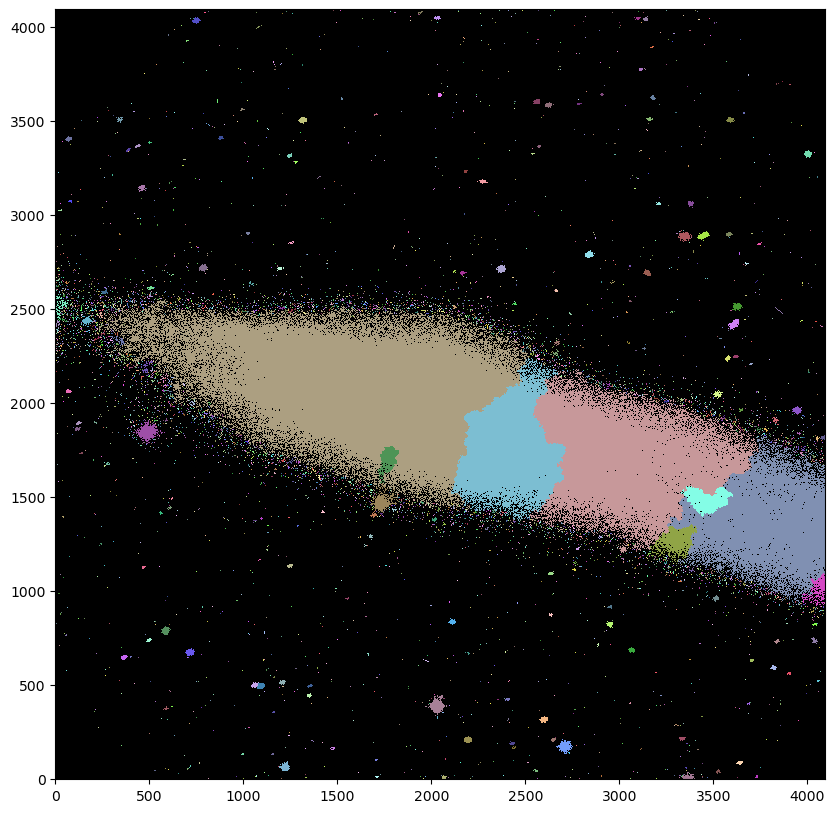

In [175]:
cmap_deblendV = source_deblendV.make_cmap(seed=123)
#Y mostramos las fuentes
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(source_deblendV, origin='lower', cmap=cmap_deblendV,interpolation='nearest')
plt.show()

In [176]:
catalogoNGC55_V = SourceCatalog(data, source_deblendV)
tbl = catalogoNGC55_V.to_table()
tablaNGC55V_d = tbl['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
#Dividimos el "flujo" por el tiempo de exposición
tablaNGC55V_d['segment_flux'] = tablaNGC55V_d['segment_flux']/header2['EXPTIME']
tablaNGC55V_d

<QTable length=9428>
label     xcentroid          ycentroid         area      segment_flux   
                                               pix2                     
int64      float64            float64        float64       float64      
----- ------------------ ------------------ --------- ------------------
    1 1205.5260584129996  1.973335574970079      10.0 1.8010716951662502
    2 1332.8693682765722  7.625313026211944      49.0  19.14687206087803
    3 1957.9711228619929 2.3720334248166197      25.0  6.085372933980455
    4  2069.784011725436  8.354561828582987     395.0  69.52885472892446
    5 2565.5390289137426 1.7857720354903126      10.0 1.7762662280455357
    6  2789.032578311719  0.795488402910669      13.0 3.2560576110550636
    7  3060.780341932893 2.0604502610274267      13.0  8.310122457654069
    8 3068.3373345280997 4.0522055672228126      15.0  2.428123206515133
    9 3366.5201991109807 7.7944976970748385    1407.0  431.0879028317881
  ...                ...                ...       ...                ...
 9419 1737.2707171578054 1469.9135850392274    8478.0  5652.492713057251
 9420 3472.9381672311333 1484.8508032953057   23783.0  4484.754069547465
 9421 1774.0547190161487  1707.867603146949   10833.0  2997.595076284365
 9422   3042.53410133742 1702.7623727560742  594544.0 108858.71677243111
 9423 2407.9448233478997 1769.4445586709908  286399.0   66464.5549551775
 9424 1602.3598508625687  2073.646622184143 1202513.0  257991.1378713728
 9425 3111.7847341430856 3339.0503720146507      43.0 11.089433871797434
 9426  3121.807314754897 3346.0185675646158      38.0  9.900081193980522
 9427 2043.0395832864558 3634.8742645705024     192.0 30.018439195731382
 9428 2048.8984367676203  3641.655665609307     154.0  24.99994705854647

FLUJO ESTRELLA HIP 277

In [177]:
d2E1 = tablaNGC55V_d
d2E1['magnitude'] = zeropointE1_V - 2.5*np.log(d2E1['segment_flux'])
d2E1

<QTable length=9428>
label     xcentroid      ...    segment_flux        magnitude     
                         ...                                      
int64      float64       ...      float64            float64      
----- ------------------ ... ------------------ ------------------
    1 1205.5260584129996 ... 1.8010716951662502 39.119173875828885
    2 1332.8693682765722 ...  19.14687206087803  33.20978015209308
    3 1957.9711228619929 ...  6.085372933980455  36.07540853069679
    4  2069.784011725436 ...  69.52885472892446  29.98577395475074
    5 2565.5390289137426 ... 1.7762662280455357  39.15384471937672
    6  2789.032578311719 ... 3.2560576110550636 37.638835706170894
    7  3060.780341932893 ...  8.310122457654069  35.29644269831632
    8 3068.3373345280997 ...  2.428123206515133  38.37233202080261
    9 3366.5201991109807 ...  431.0879028317881 25.424348510176717
  ...                ... ...                ...                ...
 9419 1737.2707171578054 ...  5652.492713057251  18.99049877316941
 9420 3472.9381672311333 ...  4484.754069547465  19.56903121316822
 9421 1774.0547190161487 ...  2997.595076284365 20.576214548348894
 9422   3042.53410133742 ... 108858.71677243111 11.595613200541898
 9423 2407.9448233478997 ...   66464.5549551775  12.82906836978334
 9424 1602.3598508625687 ...  257991.1378713728   9.43842727571765
 9425 3111.7847341430856 ... 11.089433871797434  34.57514668184071
 9426  3121.807314754897 ...  9.900081193980522  34.85877116436503
 9427 2043.0395832864558 ... 30.018439195731382  32.08559897889736
 9428 2048.8984367676203 ...  24.99994705854647 32.542944292643206

In [178]:
NGC55_D2 = np.argmax(d2E1['area']) 

#MAGNITUD APARENTE
mag_deblend_VE1 = d2E1['magnitude'][NGC55_D2] 
mag_deblend_VE1

9.43842727571765

ESTRELLA HIP 1101

In [179]:
d2E2 = tablaNGC55V_d
d2E2['magnitude'] = zeropointE2_V - 2.5*np.log(d2E2['segment_flux'])
d2E2

<QTable length=9428>
label     xcentroid      ...    segment_flux        magnitude     
                         ...                                      
int64      float64       ...      float64            float64      
----- ------------------ ... ------------------ ------------------
    1 1205.5260584129996 ... 1.8010716951662502  41.20102505647909
    2 1332.8693682765722 ...  19.14687206087803 35.291631332743286
    3 1957.9711228619929 ...  6.085372933980455 38.157259711346995
    4  2069.784011725436 ...  69.52885472892446 32.067625135400945
    5 2565.5390289137426 ... 1.7762662280455357 41.235695900026926
    6  2789.032578311719 ... 3.2560576110550636   39.7206868868211
    7  3060.780341932893 ...  8.310122457654069 37.378293878966524
    8 3068.3373345280997 ...  2.428123206515133 40.454183201452814
    9 3366.5201991109807 ...  431.0879028317881  27.50619969082692
  ...                ... ...                ...                ...
 9419 1737.2707171578054 ...  5652.492713057251 21.072349953819614
 9420 3472.9381672311333 ...  4484.754069547465 21.650882393818424
 9421 1774.0547190161487 ...  2997.595076284365 22.658065728999098
 9422   3042.53410133742 ... 108858.71677243111 13.677464381192102
 9423 2407.9448233478997 ...   66464.5549551775 14.910919550433544
 9424 1602.3598508625687 ...  257991.1378713728 11.520278456367855
 9425 3111.7847341430856 ... 11.089433871797434  36.65699786249091
 9426  3121.807314754897 ...  9.900081193980522 36.940622345015235
 9427 2043.0395832864558 ... 30.018439195731382  34.16745015954756
 9428 2048.8984367676203 ...  24.99994705854647  34.62479547329341

In [180]:
#magnitud aparente 
mag_deblend_VE2 = d2E2['magnitude'][NGC55_D2] 
mag_deblend_VE2

11.520278456367855

## Diagrama

In [253]:
#Calculamos las magnitudes aparentes usando el zeropoint
tablaNGC55B_d['magnitude'] = zeropointE1_B - 2.5*np.log(tablaNGC55B_d['segment_flux'])
B_color=np.array([np.sort(tablaNGC55B_d['magnitude'])])

tablaNGC55V_d['magnitude'] = zeropointE1_V - 2.5*np.log(tablaNGC55V_d['segment_flux'])
V_color=np.array([np.sort(tablaNGC55V_d['magnitude'])])

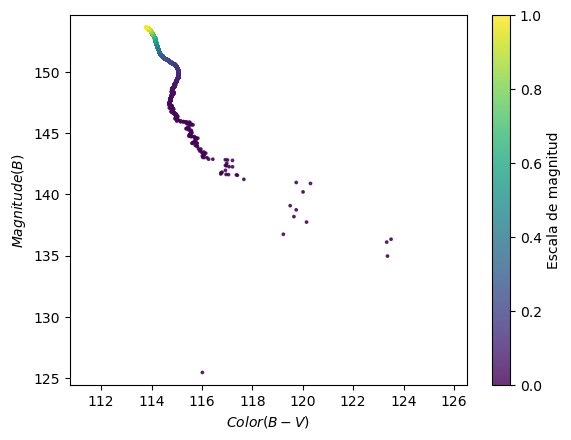

In [254]:
min_len = min(len(tablaNGC55B_d['magnitude']), len(tablaNGC55V_d['magnitude']))

B_color = np.sort(tablaNGC55B_d['magnitude'])[:min_len]
V_color = np.sort(tablaNGC55V_d['magnitude'])[:min_len]

x = B_color - V_color
y = B_color


colors = np.linspace(0, 1, min_len)

plt.scatter(x, y, c=colors, cmap='viridis', marker='o', s=3, alpha=0.8)

plt.gca().invert_yaxis()
plt.ylabel('$Magnitude (B)$')
plt.xlabel('$Color (B-V)$')
plt.xlim(np.min(x) - 3, np.max(x) + 3)
plt.ylim(np.min(y) - 1, np.max(y) + 1)

cbar = plt.colorbar()
cbar.set_label('Escala de magnitud')
#plt.savefig('Diagrama Color-Magnitud E1')
plt.show()

In [193]:
#Calculamos las magnitudes aparentes usando el zeropoint
tablaNGC55B_d['magnitude'] = zeropointE2_B - 2.5*np.log(tablaNGC55B_d['segment_flux'])
B_color=np.array([np.sort(tablaNGC55B_d['magnitude'])])

tablaNGC55V_d['magnitude'] = zeropointE2_V - 2.5*np.log(tablaNGC55V_d['segment_flux'])
V_color=np.array([np.sort(tablaNGC55V_d['magnitude'])])

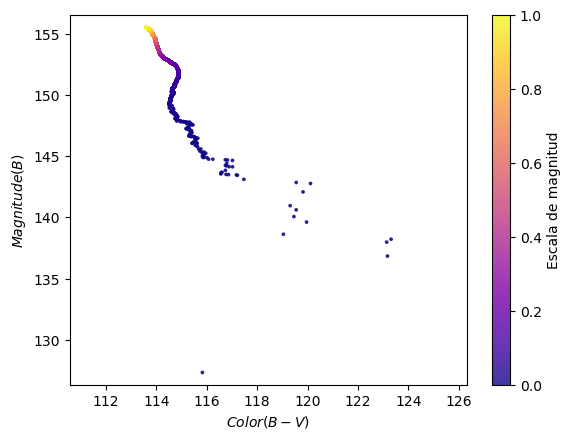

In [194]:
min_len = min(len(tablaNGC55B_d['magnitude']), len(tablaNGC55V_d['magnitude']))

B_color = np.sort(tablaNGC55B_d['magnitude'])[:min_len]
V_color = np.sort(tablaNGC55V_d['magnitude'])[:min_len]

x = B_color - V_color
y = B_color


colors = np.linspace(0, 1, min_len)


plt.scatter(x, y, c=colors, cmap='plasma', marker='o', s=3, alpha=0.8)

plt.gca().invert_yaxis()
plt.ylabel('$Magnitude (B)$')
plt.xlabel('$Color (B-V)$')
plt.xlim(np.min(x) - 3, np.max(x) + 3)
plt.ylim(np.min(y) - 1, np.max(y) + 1)

cbar = plt.colorbar()
cbar.set_label('Escala de magnitud')
#plt.savefig('Diagrama Color-Magnitud E2')
plt.show()
